In [1]:
import pandas as pd

In [2]:
tr = pd.read_parquet(r"../data/processed_data/transaction.parquet")

In [4]:
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)


## Data review

In [3]:
def data_review(df):
    '''
    funcion que recibe un dataframe y devuelve un dataframe con informacion acerca de el dataframe ingresado
    '''

    mi_dict = {"Column": [], "dType": [], "No_Null_%": [], "No_Null_Qty": [], "Null_%": [], "Null_Qty": []}
    duplicated_rows = df[df.duplicated()]
    count_duplicated_rows = len(duplicated_rows)


    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_dict["Column"].append(columna)
        mi_dict["dType"].append(df[columna].apply(type).unique())
        mi_dict["No_Null_%"].append(round(porcentaje_no_nulos, 2))
        mi_dict["No_Null_Qty"].append(df[columna].count())
        mi_dict["Null_%"].append(round(100-porcentaje_no_nulos, 2))
        mi_dict['Null_Qty'].append(df[columna].isnull().sum())

    df_info = pd.DataFrame(mi_dict)
    
    print("\nTotal rows: ", len(df))
    print("\nTotal full null rows: ", df.isna().all(axis=1).sum())
    print("\nTotal duplicated rows:", count_duplicated_rows)
    
    return df_info

In [4]:
dr = data_review(tr)


Total rows:  590540

Total full null rows:  0

Total duplicated rows: 0


In [5]:
dr

Column              dType  No_Null_%  No_Null_Qty  Null_%  \
0     TransactionID    [<class 'int'>]     100.00       590540    0.00   
1           isFraud    [<class 'int'>]     100.00       590540    0.00   
2     TransactionDT    [<class 'int'>]     100.00       590540    0.00   
3    TransactionAmt  [<class 'float'>]     100.00       590540    0.00   
4         ProductCD    [<class 'str'>]     100.00       590540    0.00   
..              ...                ...        ...          ...     ...   
389            V335  [<class 'float'>]      13.95        82351   86.05   
390            V336  [<class 'float'>]      13.95        82351   86.05   
391            V337  [<class 'float'>]      13.95        82351   86.05   
392            V338  [<class 'float'>]      13.95        82351   86.05   
393            V339  [<class 'float'>]      13.95        82351   86.05   

     Null_Qty  
0           0  
1           0  
2           0  
3           0  
4           0  
..        ...  
389    508189  
390    508189  
391    508189  
392    508189  
393    508189  

[394 rows x 6 columns]

### borrar columnas con mas de 80% valores nulos

In [6]:
columns_to_drop = dr[dr['Null_%'] > 80]['Column'].tolist()

In [7]:
columns_to_drop

['dist2',
 'D6',
 'D7',
 'D8',
 'D9',
 'D12',
 'D13',
 'D14',
 'V138',
 'V139',
 'V140',
 'V141',
 'V142',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V161',
 'V162',
 'V163',
 'V164',
 'V165',
 'V166',
 'V322',
 'V323',
 'V324',
 'V325',
 'V326',
 'V327',
 'V328',
 'V329',
 'V330',
 'V331',
 'V332',
 'V333',
 'V334',
 'V335',
 'V336',
 'V337',
 'V338',
 'V339']

In [8]:
tr.shape

(590540, 394)

In [9]:
df_cleaned = tr.drop(columns=columns_to_drop)

In [10]:
df_cleaned.shape

(590540, 339)

In [11]:
#actualizando dr
dr = data_review(df_cleaned)


Total rows:  590540

Total full null rows:  0

Total duplicated rows: 0


## borrando columnas de texto

In [12]:
text_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()

In [13]:
text_columns

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [14]:
df_cleaned[text_columns] = df_cleaned[text_columns].fillna('')

In [15]:
df_corr = df_cleaned.drop(columns=text_columns)

In [16]:
# actualizando dr
dr = data_review(df_corr)


Total rows:  590540

Total full null rows:  0

Total duplicated rows: 0


<hr>

In [17]:
dr

Column              dType  No_Null_%  No_Null_Qty  Null_%  \
0     TransactionID    [<class 'int'>]      100.0       590540     0.0   
1           isFraud    [<class 'int'>]      100.0       590540     0.0   
2     TransactionDT    [<class 'int'>]      100.0       590540     0.0   
3    TransactionAmt  [<class 'float'>]      100.0       590540     0.0   
4             card1    [<class 'int'>]      100.0       590540     0.0   
..              ...                ...        ...          ...     ...   
320            V317  [<class 'float'>]      100.0       590528     0.0   
321            V318  [<class 'float'>]      100.0       590528     0.0   
322            V319  [<class 'float'>]      100.0       590528     0.0   
323            V320  [<class 'float'>]      100.0       590528     0.0   
324            V321  [<class 'float'>]      100.0       590528     0.0   

     Null_Qty  
0           0  
1           0  
2           0  
3           0  
4           0  
..        ...  
320        12  
321        12  
322        12  
323        12  
324        12  

[325 rows x 6 columns]

<hr>

## correlacion

In [39]:
matriz = df_corr.corr()

In [40]:
matriz = matriz["isFraud"]

In [41]:
significant_corr = matriz[(matriz >= 0.1) | (matriz <= -0.1)]

In [42]:
significant_columns = significant_corr.index.to_list()

In [44]:
del significant_corr
del matriz

In [43]:
significant_columns

['isFraud',
 'card3',
 'V15',
 'V16',
 'V17',
 'V18',
 'V21',
 'V22',
 'V23',
 'V24',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V37',
 'V38',
 'V39',
 'V40',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V57',
 'V58',
 'V59',
 'V60',
 'V63',
 'V64',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V84',
 'V85',
 'V86',
 'V87',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V111',
 'V112',
 'V113',
 'V123',
 'V125',
 'V170',
 'V171',
 'V176',
 'V184',
 'V185',
 'V186',
 'V188',
 'V189',
 'V190',
 'V194',
 'V195',
 'V197',
 'V198',
 'V199',
 'V200',
 'V201',
 'V221',
 'V222',
 'V228',
 'V229',
 'V230',
 'V238',
 'V239',
 'V242',
 'V243',
 'V244',
 'V246',
 'V247',
 'V249',
 'V252',
 'V257',
 'V258',
 'V259',
 'V260',
 'V261',
 'V262',
 'V282',
 'V283',
 'V302',
 'V303',
 'V304']

In [45]:
# separamos la columna isFraud para juntarla con cada conjunto de columnas
Y = df_corr["isFraud"]
del df_corr["isFraud"]

In [46]:
dr

Column              dType  No_Null_%  No_Null_Qty  Null_%  \
0     TransactionID    [<class 'int'>]      100.0       590540     0.0   
1           isFraud    [<class 'int'>]      100.0       590540     0.0   
2     TransactionDT    [<class 'int'>]      100.0       590540     0.0   
3    TransactionAmt  [<class 'float'>]      100.0       590540     0.0   
4             card1    [<class 'int'>]      100.0       590540     0.0   
..              ...                ...        ...          ...     ...   
320            V317  [<class 'float'>]      100.0       590528     0.0   
321            V318  [<class 'float'>]      100.0       590528     0.0   
322            V319  [<class 'float'>]      100.0       590528     0.0   
323            V320  [<class 'float'>]      100.0       590528     0.0   
324            V321  [<class 'float'>]      100.0       590528     0.0   

     Null_Qty  
0           0  
1           0  
2           0  
3           0  
4           0  
..        ...  
320        12  
321        12  
322        12  
323        12  
324        12  

[325 rows x 6 columns]

In [47]:
dr.shape

(325, 6)

In [48]:
def split_dataframe(df,num_columns):
    dataframes = []

    for  i in range(0,df.shape[1],num_columns):
        df_part = df.iloc[:,i:i+num_columns]
        dataframes.append(df_part)
    return dataframes 

In [24]:
dframes = split_dataframe(df_corr,9)

In [25]:
len(dframes)

36

In [26]:
df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,df31,df32,df33,df34,df35,df36 = dframes

In [29]:
del dframes

In [27]:
#columns_to_drop = dr[dr['Null_%'] != 0]['Column'].tolist() #0%
#columns_to_drop = dr[dr['Null_%'] > 10]['Column'].tolist() #0%-10%
#columns_to_drop = dr[(dr['Null_%'] < 10) & (dr['Null_%'] <= 20)]['Column'].tolist() #10%-20%
#columns_to_drop = dr[(dr['Null_%'] < 20) & (dr['Null_%'] < 30)]['Column'].tolist() #20%-30%
#columns_to_drop = dr[(dr['Null_%'] < 30) & (dr['Null_%'] < 40)]['Column'].tolist() #30%-40%
#columns_to_drop = dr[(dr['Null_%'] < 40) & (dr['Null_%'] < 50)]['Column'].tolist() #50%-60%
#columns_to_drop = dr[(dr['Null_%'] < 50) & (dr['Null_%'] < 60)]['Column'].tolist() #60%-70%
#columns_to_drop = dr[(dr['Null_%'] < 60) & (dr['Null_%'] < 70)]['Column'].tolist() #70%-80%
#columns_to_drop = dr[(dr['Null_%'] < 70) & (dr['Null_%'] < 80)]['Column'].tolist() #80%-90%
#columns_to_drop = dr[(dr['Null_%'] < 80) & (dr['Null_%'] < 90)]['Column'].tolist() #90%-100%
#columns_to_drop = dr[(dr['Null_%'] < 90)['Column'].tolist() #90%-100%

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1/36

In [31]:
df1["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

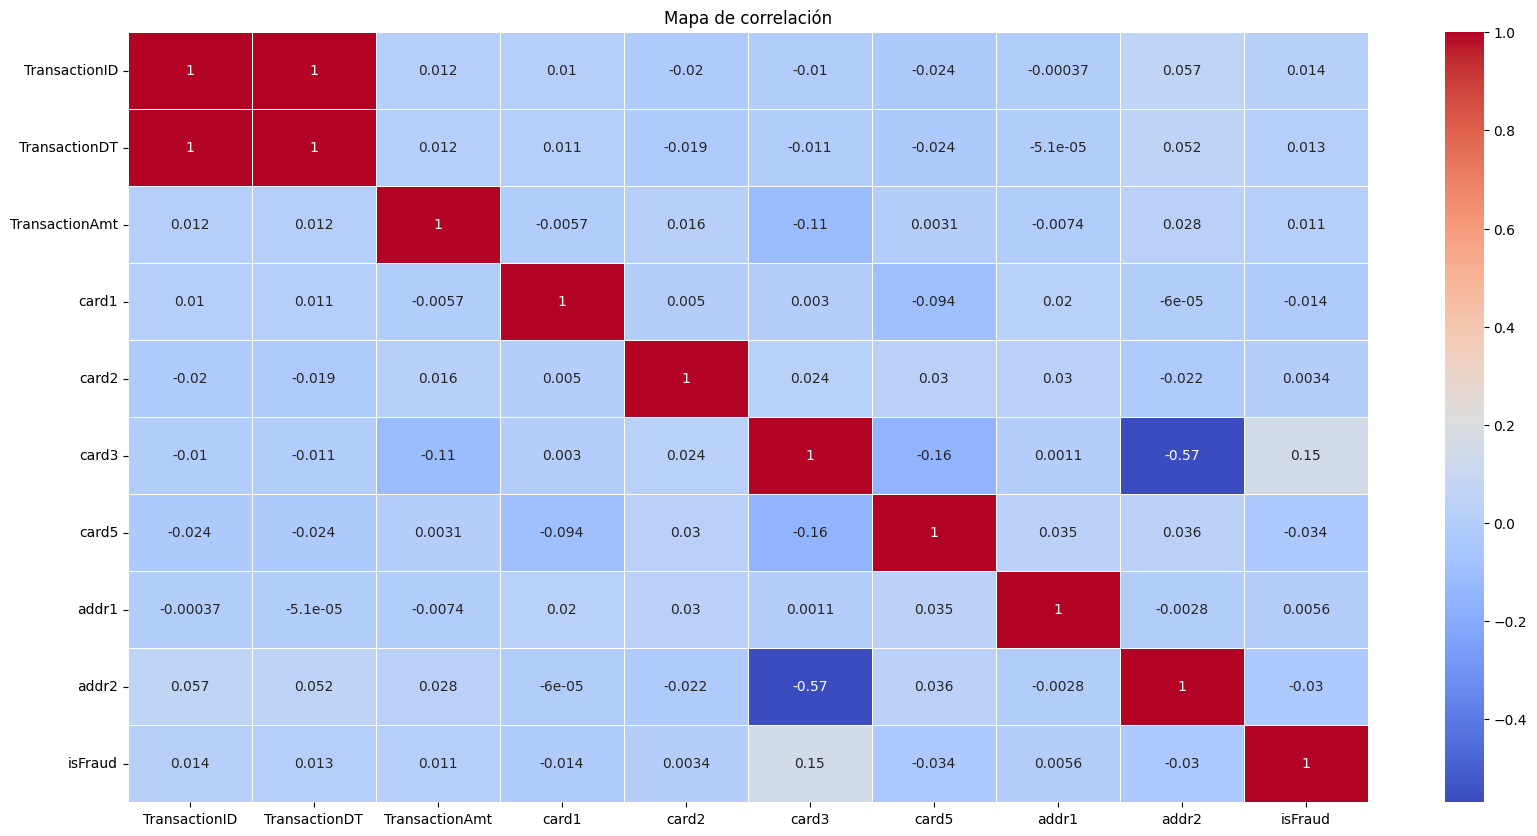

In [32]:
plt.figure(figsize=(20, 10))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [33]:
del df1

    V302  0.13
    V303  0.12
    V304  0.13

## 2/36

In [34]:
df2["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

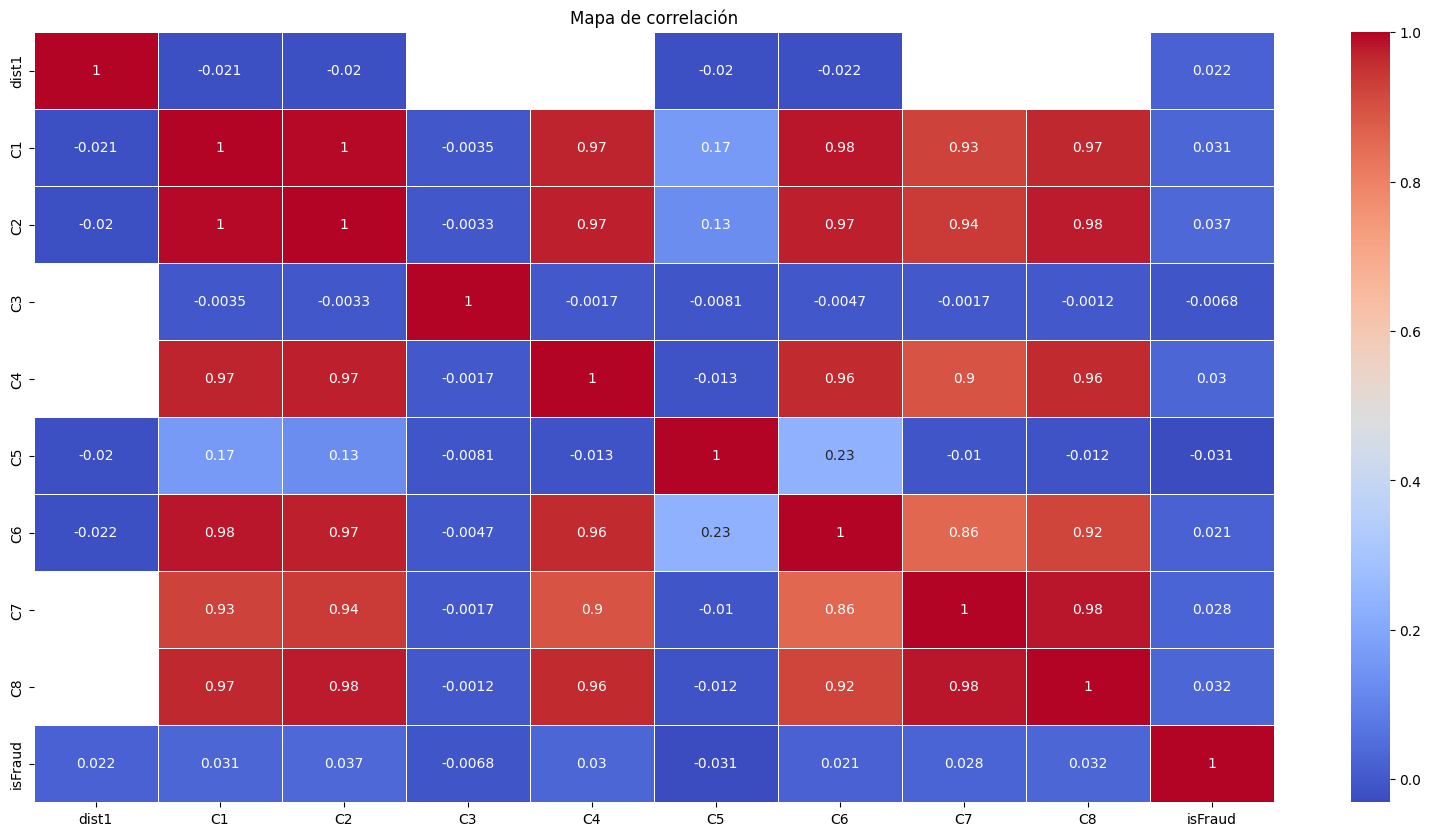

In [35]:
plt.figure(figsize=(20, 10))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [36]:
del df2

##  3/36

In [37]:
df3["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

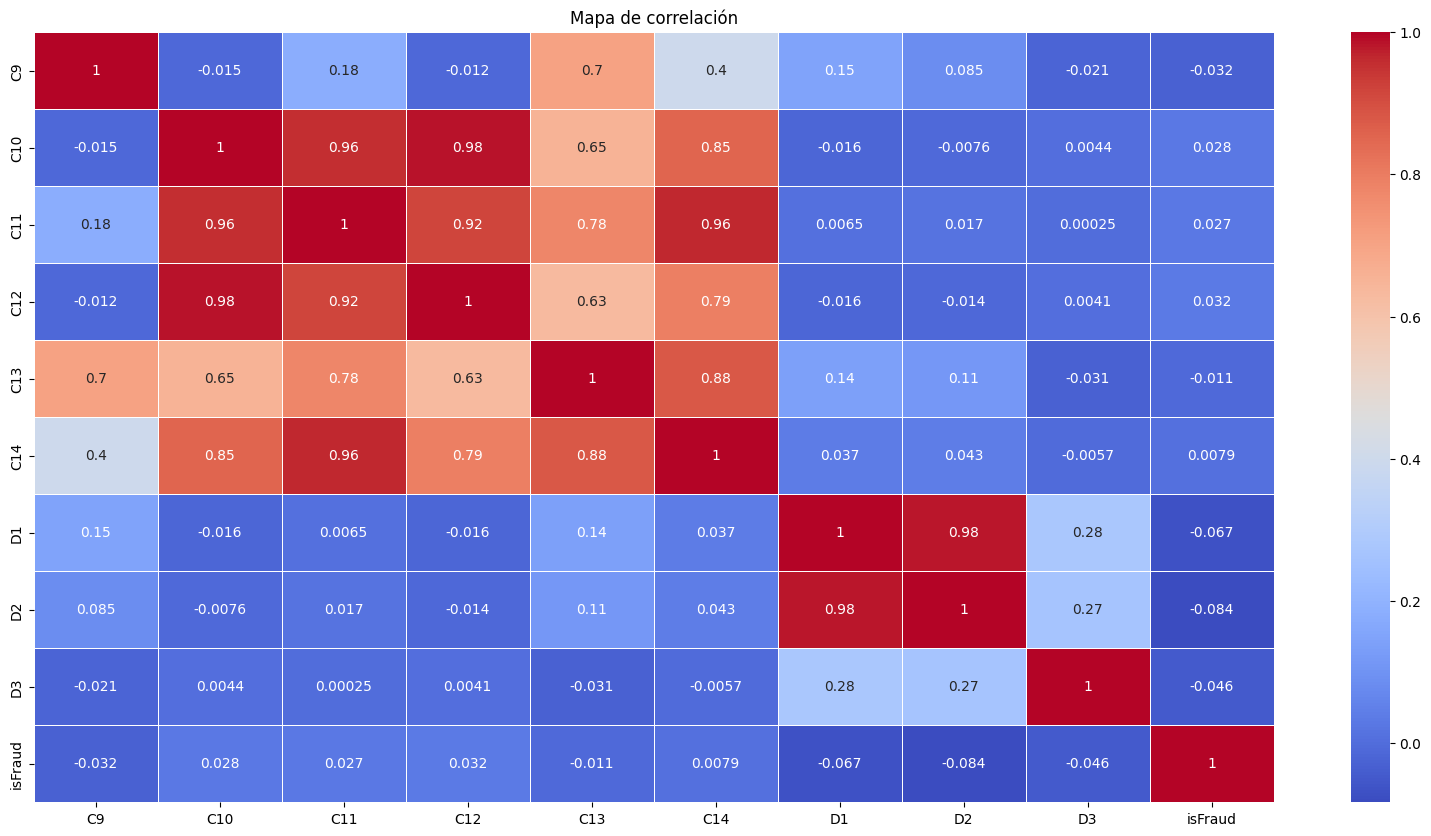

In [38]:
plt.figure(figsize=(20, 10))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [39]:
del df3

## 4/36

In [40]:
df4["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

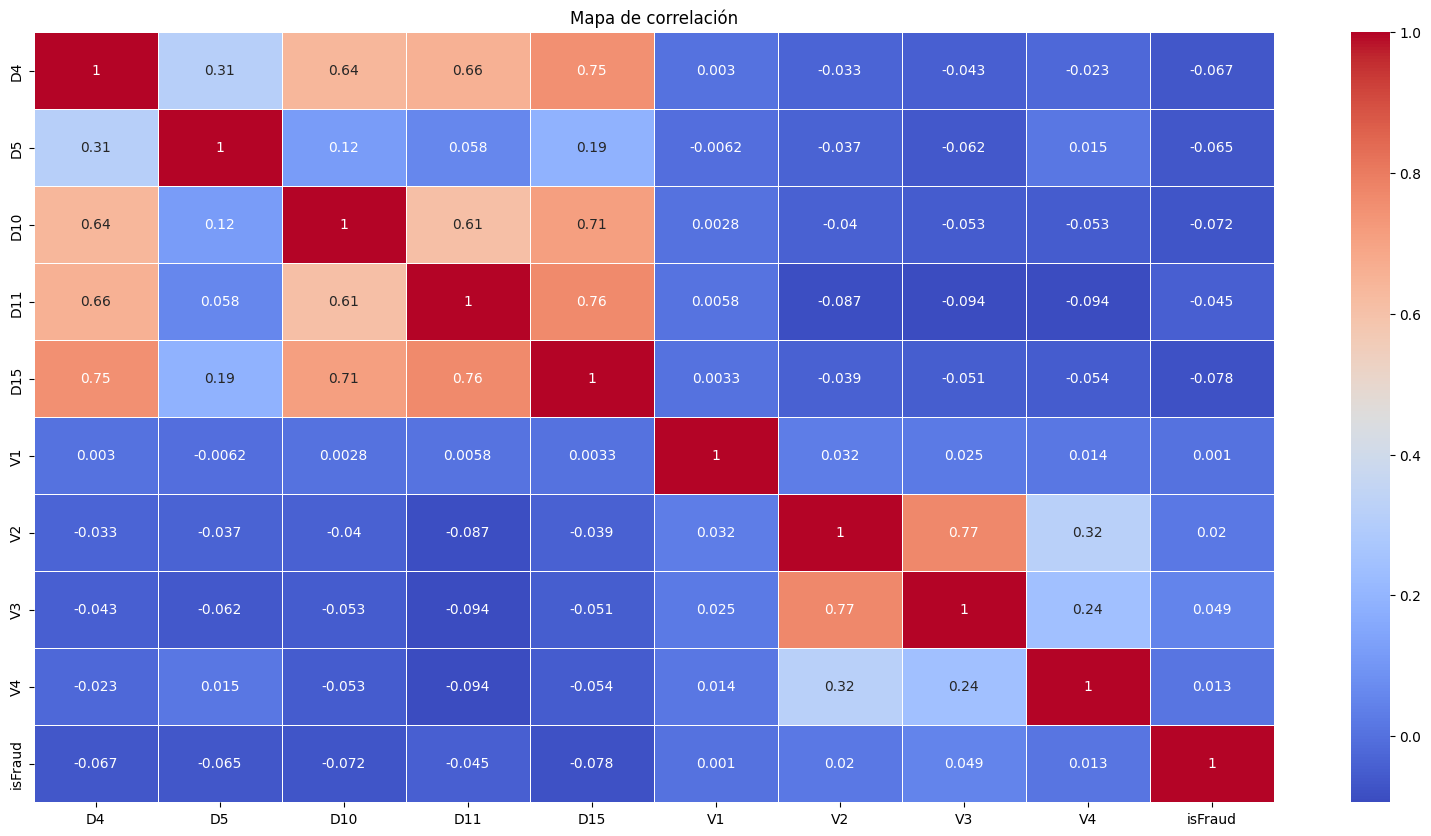

In [41]:
plt.figure(figsize=(20, 10))
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [42]:
del df4

## 5/36

In [43]:
df5["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

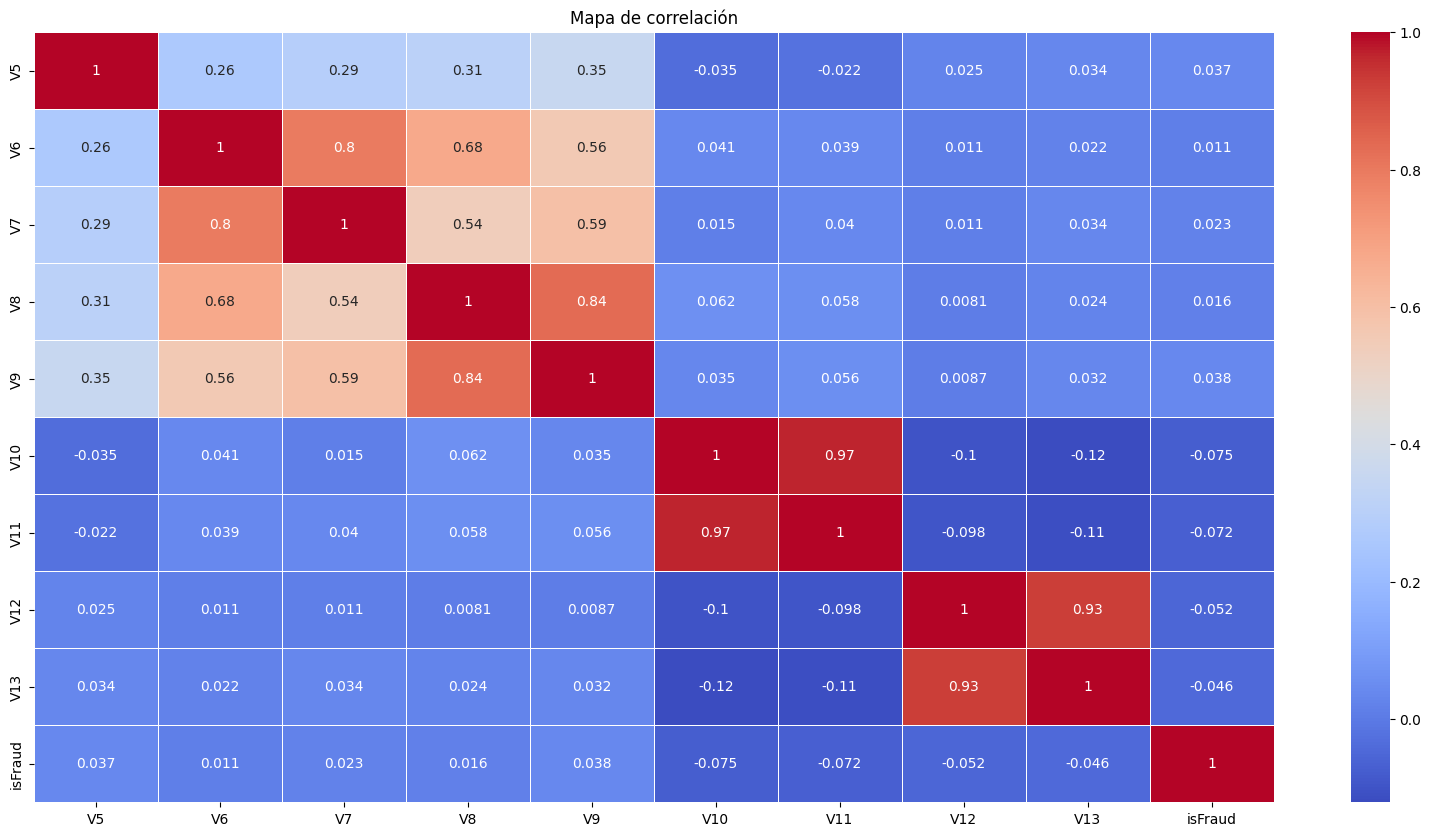

In [44]:
plt.figure(figsize=(20, 10))
sns.heatmap(df5.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [45]:
del df5

## 6/36

In [46]:
df6["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

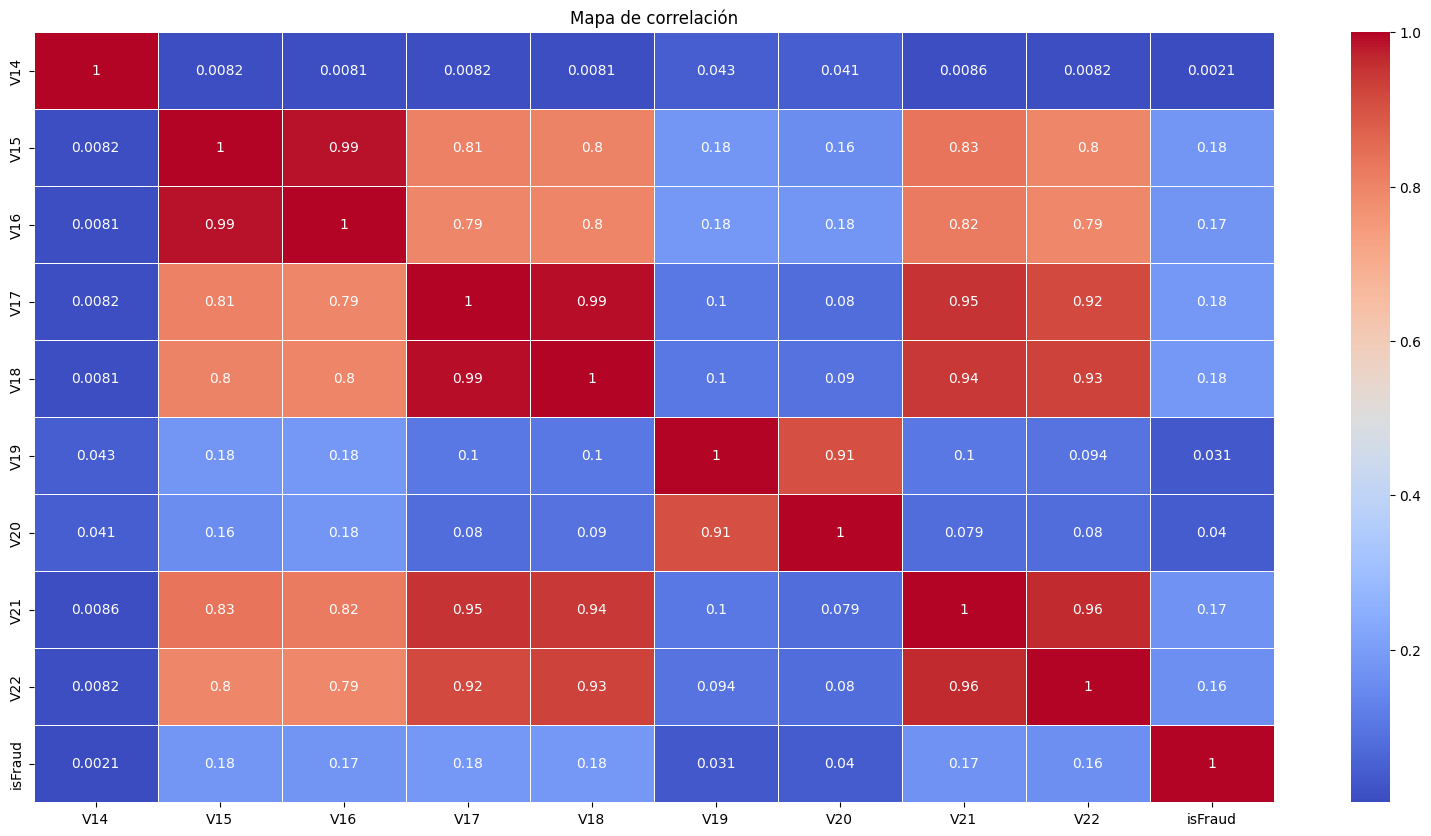

In [47]:
plt.figure(figsize=(20, 10))
sns.heatmap(df6.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [48]:
del df6

## 7/36

In [49]:
df7["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

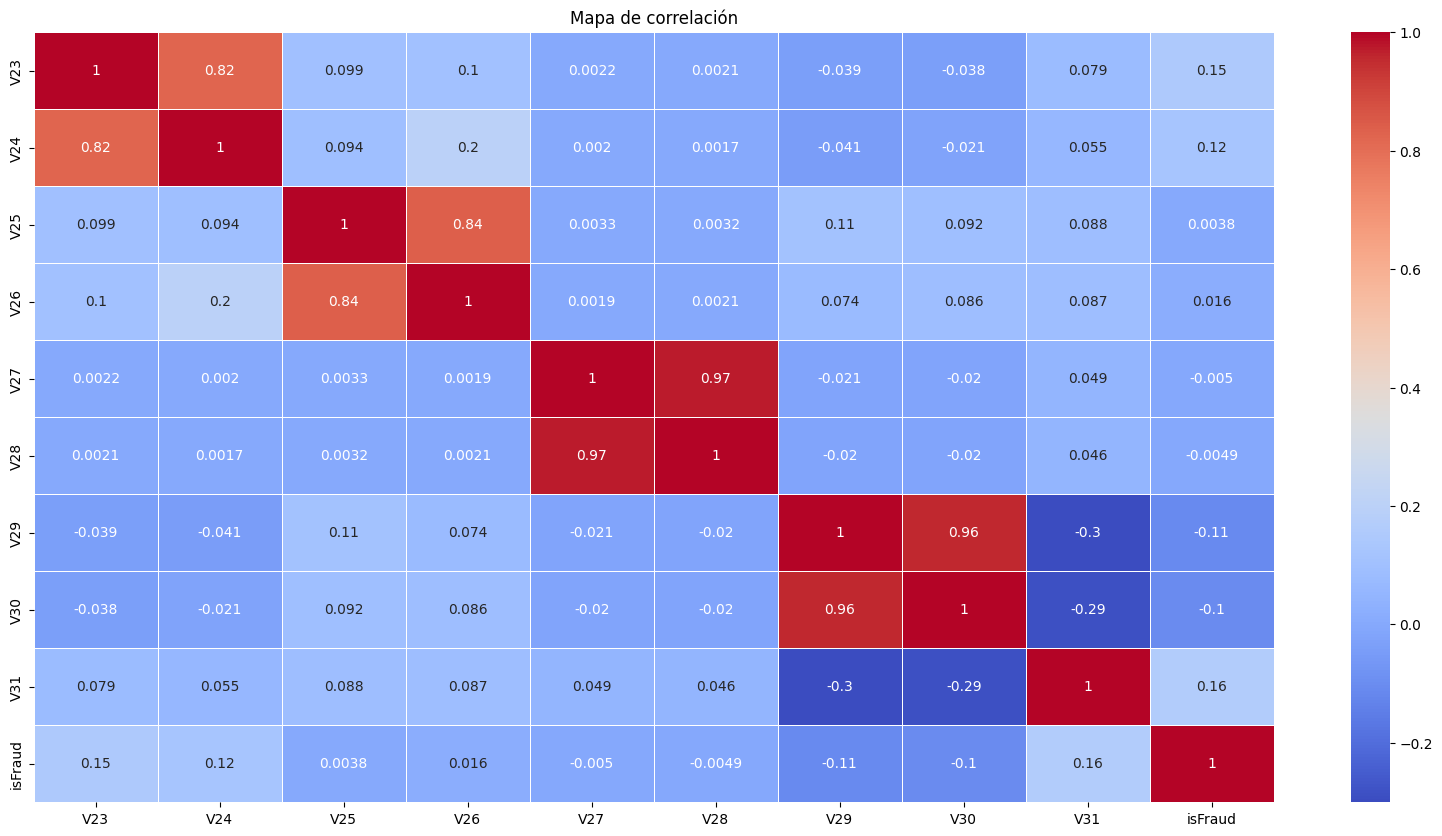

In [50]:
plt.figure(figsize=(20, 10))
sns.heatmap(df7.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [51]:
del df7

## 8/36

In [53]:
df8["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

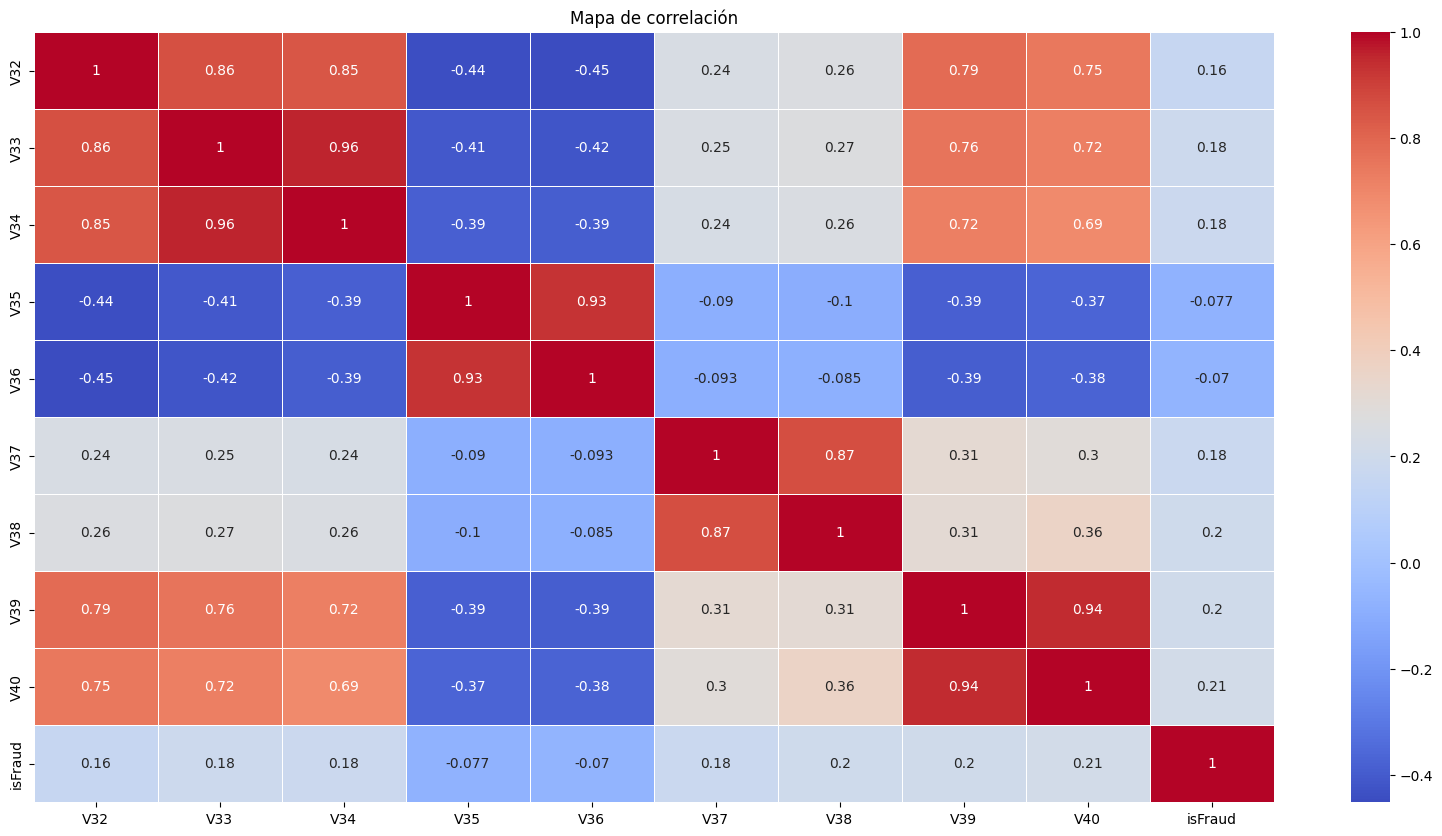

In [54]:
plt.figure(figsize=(20, 10))
sns.heatmap(df8.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [55]:
del df8

## 9/36

In [56]:
df9["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

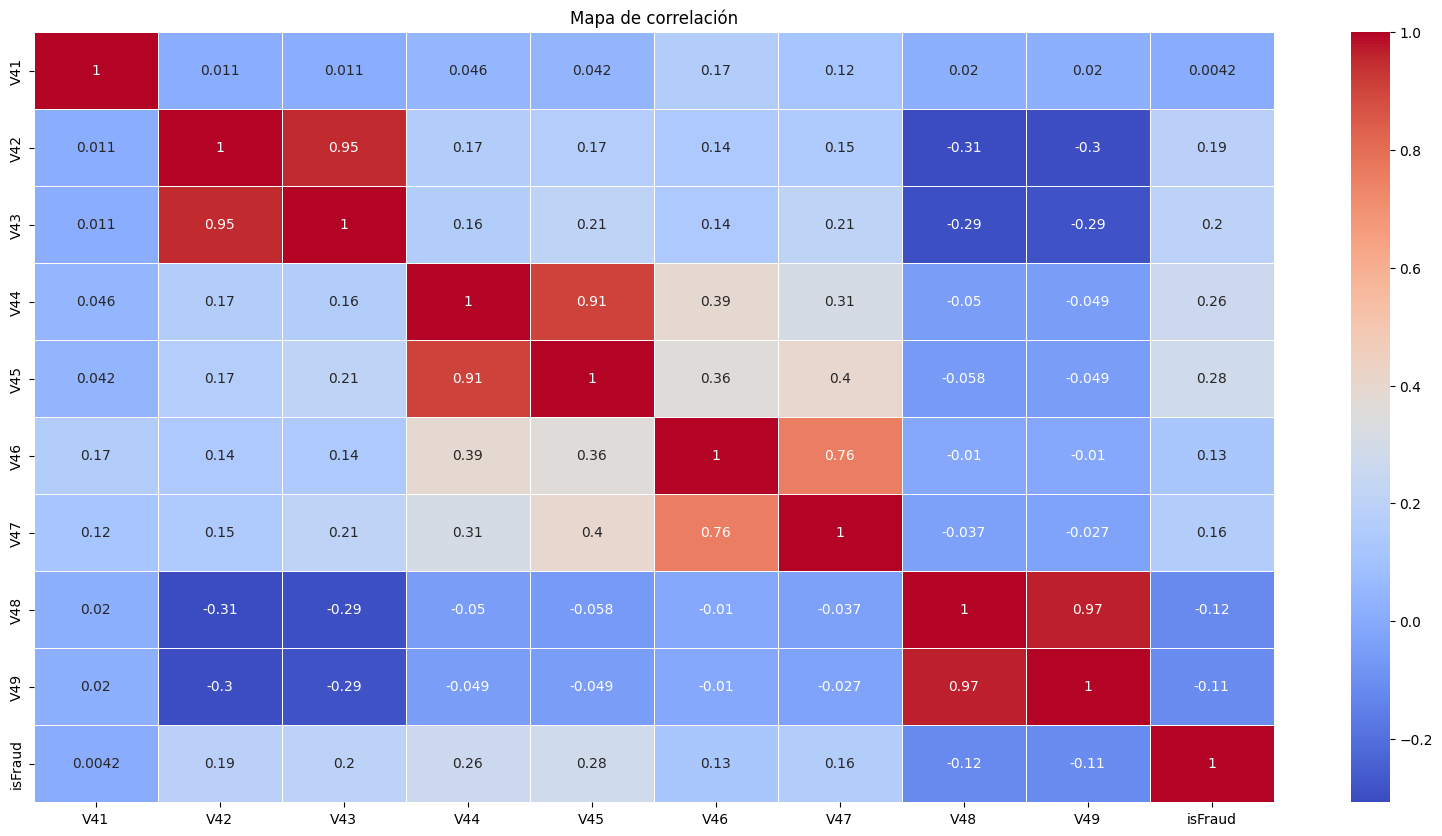

In [57]:
plt.figure(figsize=(20, 10))
sns.heatmap(df9.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [58]:
del df9

## 10/36

In [59]:
df10["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

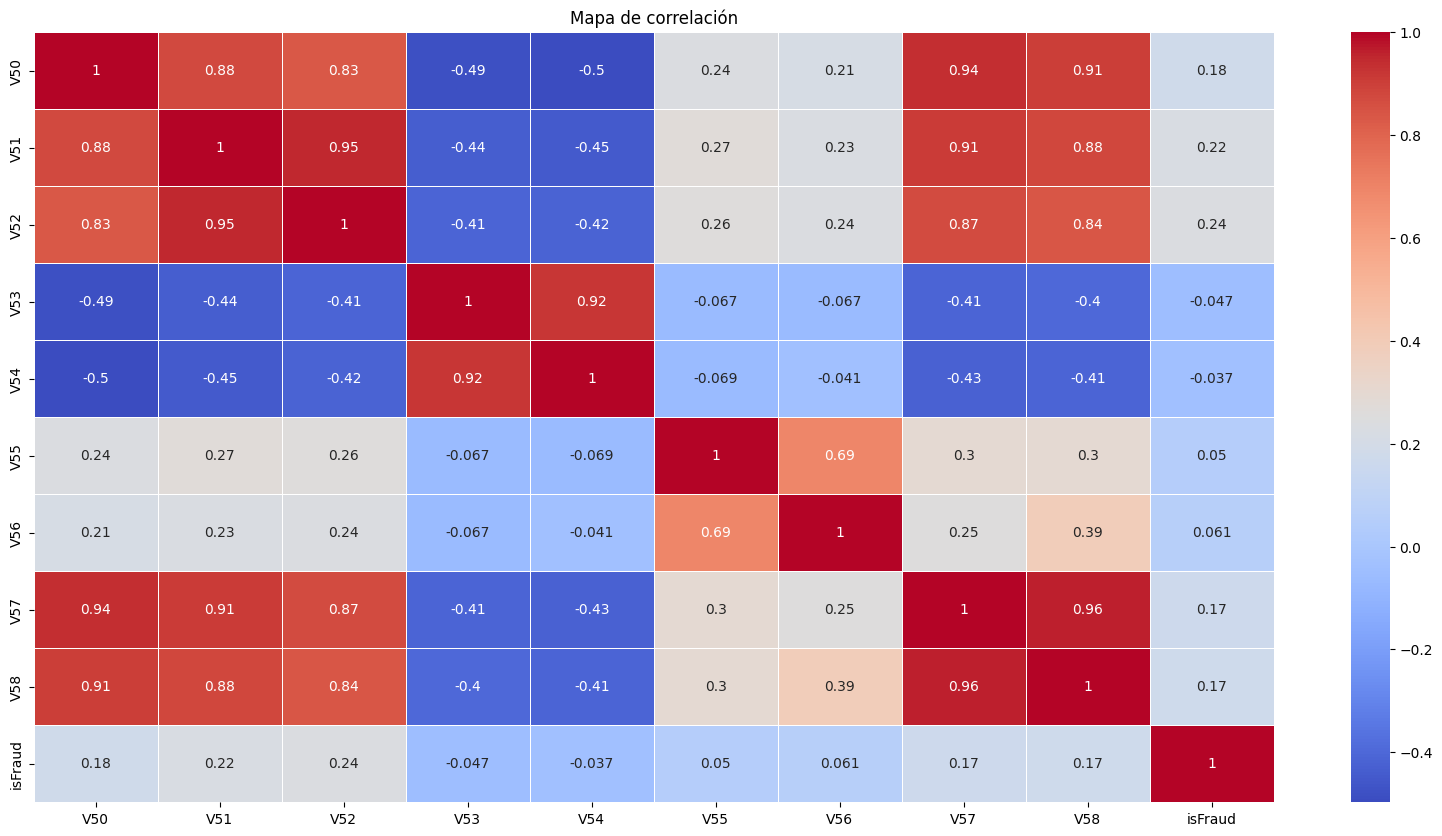

In [60]:
plt.figure(figsize=(20, 10))
sns.heatmap(df10.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [61]:
del df10

## 11/36

In [62]:
df11["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

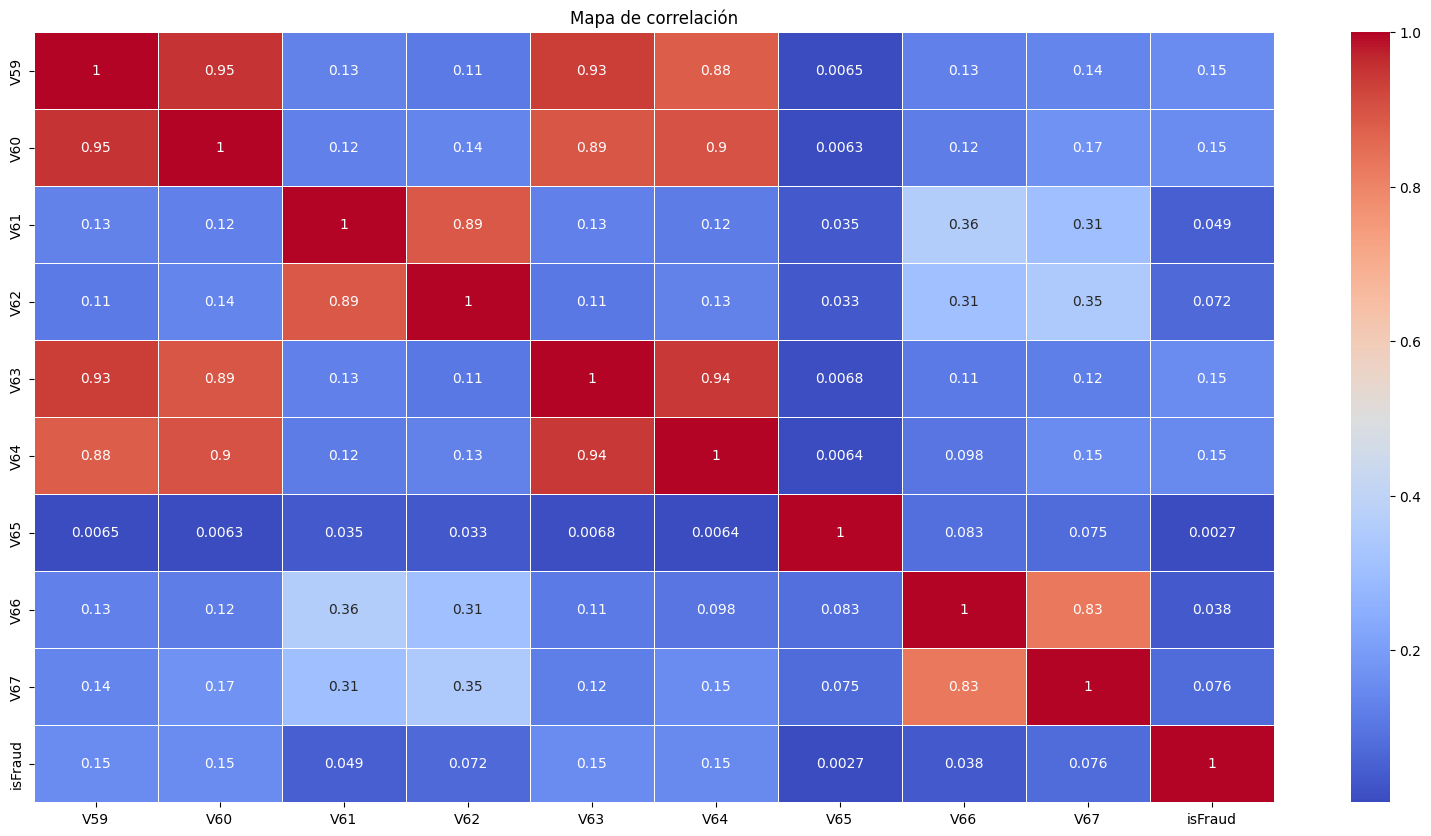

In [63]:
plt.figure(figsize=(20, 10))
sns.heatmap(df11.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [64]:
del df11

## 12/36

In [65]:
df12["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

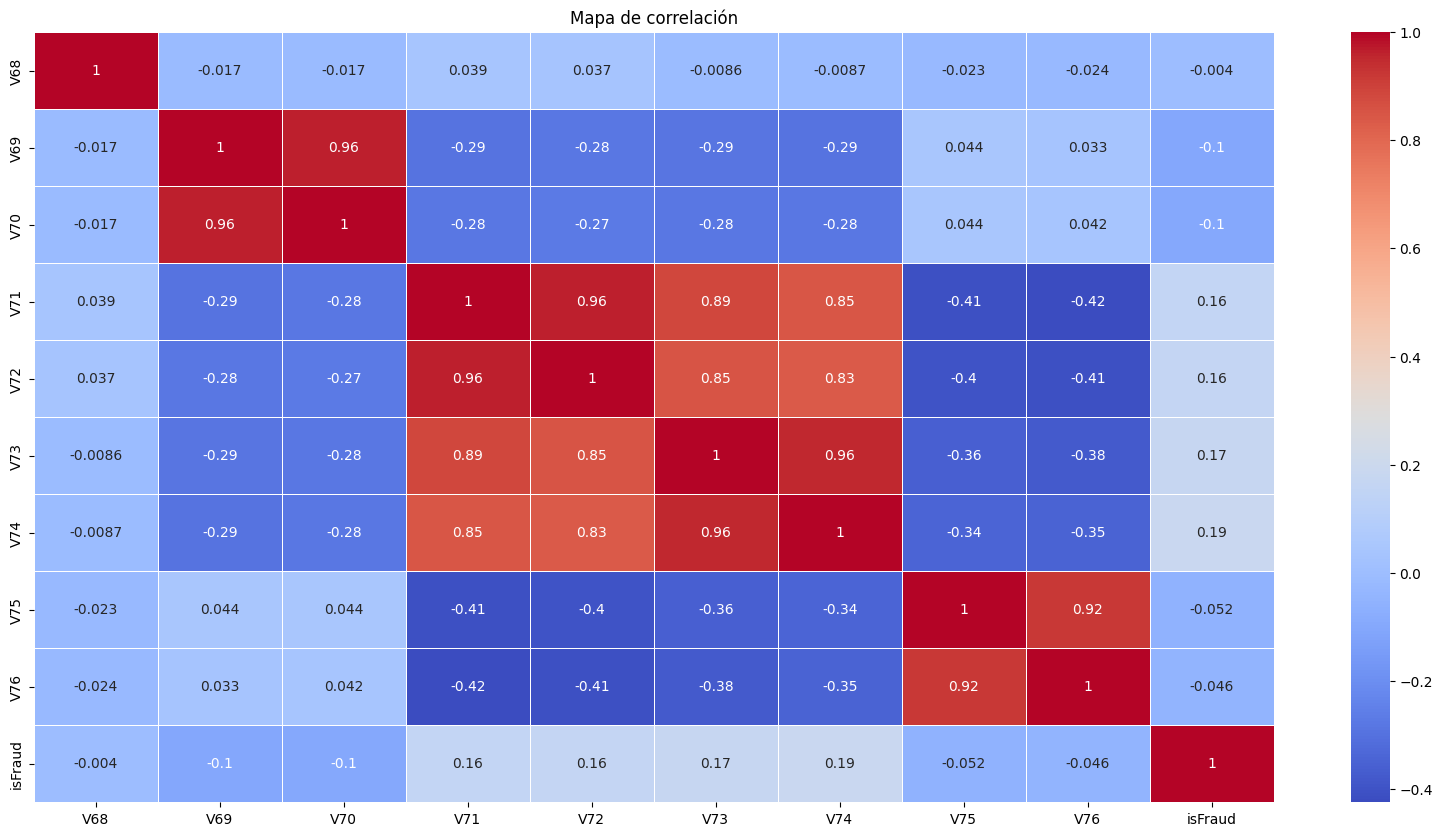

In [66]:
plt.figure(figsize=(20, 10))
sns.heatmap(df12.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [67]:
del df12

## 13/36

In [68]:
df13["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

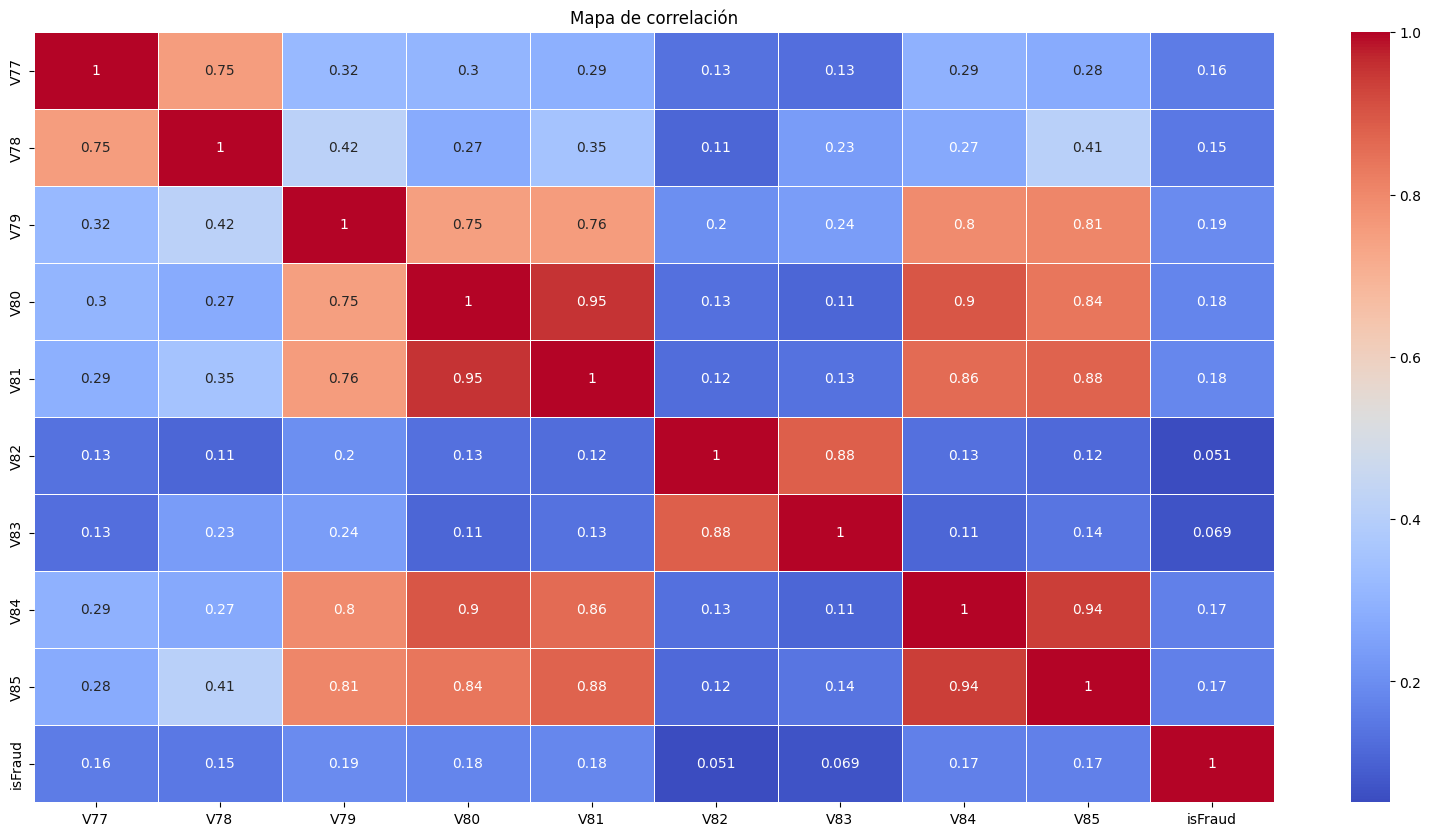

In [69]:
plt.figure(figsize=(20, 10))
sns.heatmap(df13.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [70]:
del df13

## 14/36

In [71]:
df14["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

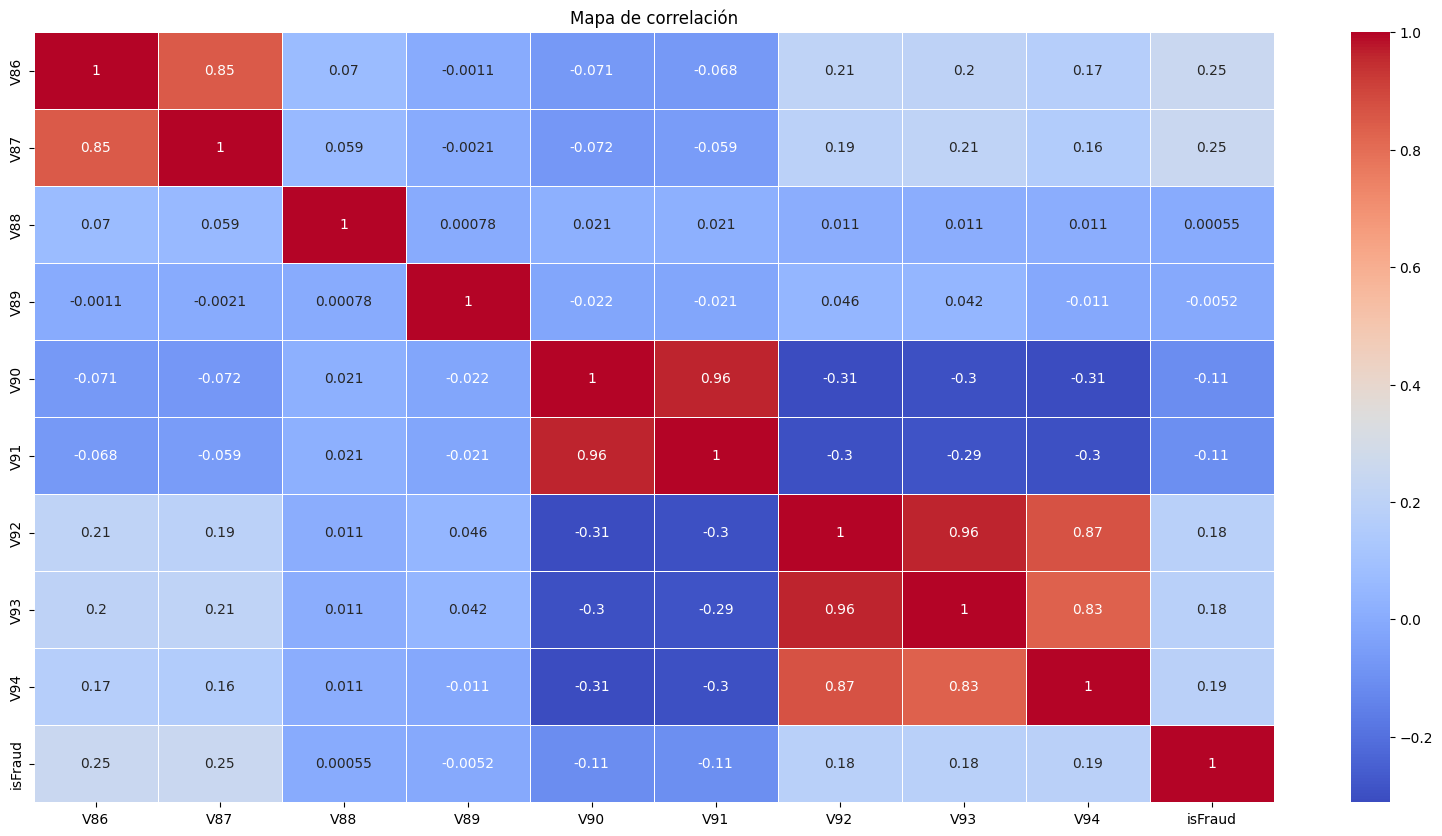

In [73]:
plt.figure(figsize=(20, 10))
sns.heatmap(df14.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [74]:
del df14

## 15/36

In [75]:
df15["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

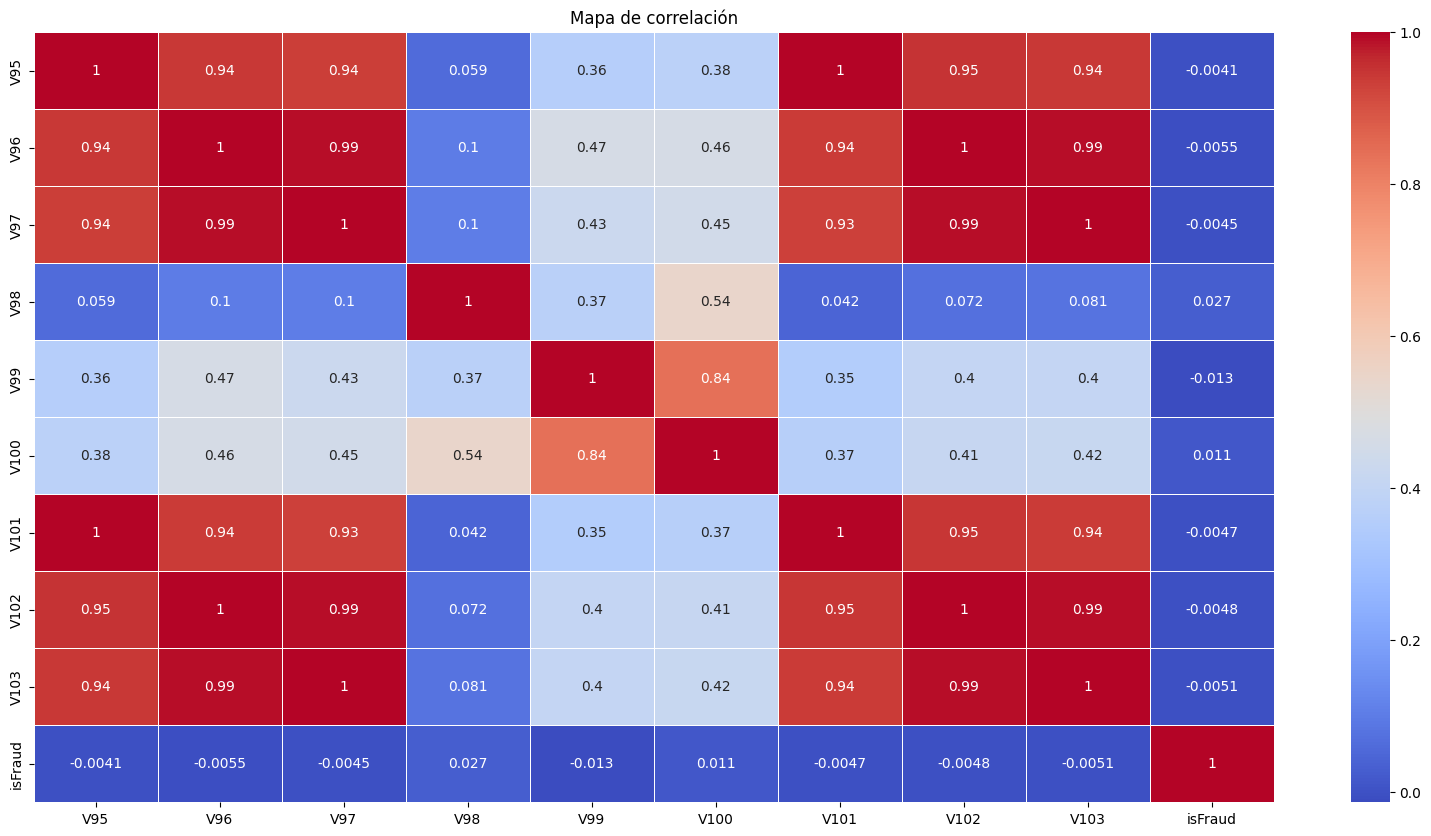

In [97]:
plt.figure(figsize=(20, 10))
sns.heatmap(df15.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [98]:
del df15

## 16/36

In [99]:
df16["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

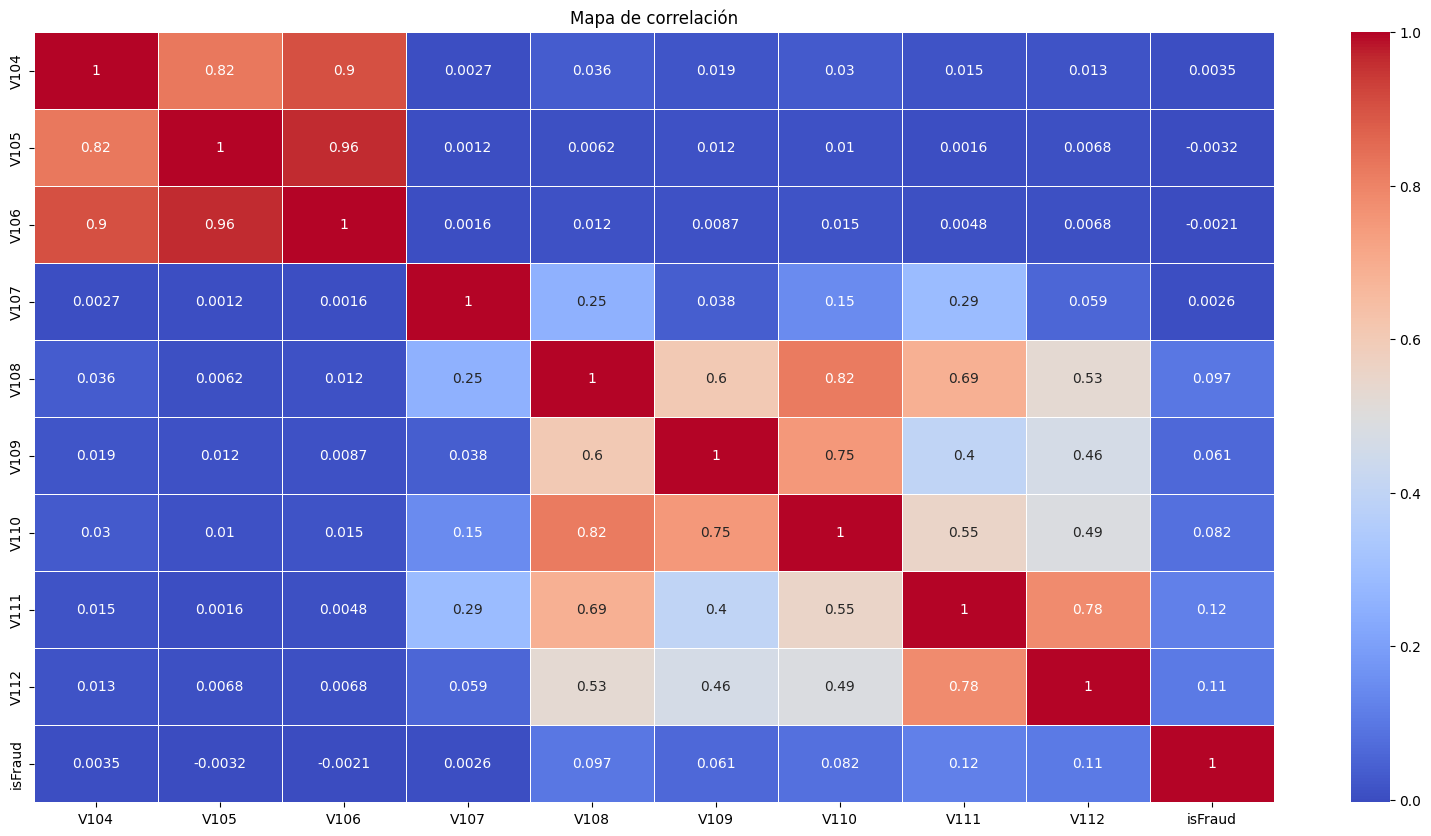

In [100]:
plt.figure(figsize=(20, 10))
sns.heatmap(df16.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [101]:
del df16

## 17/36

In [102]:
df17["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

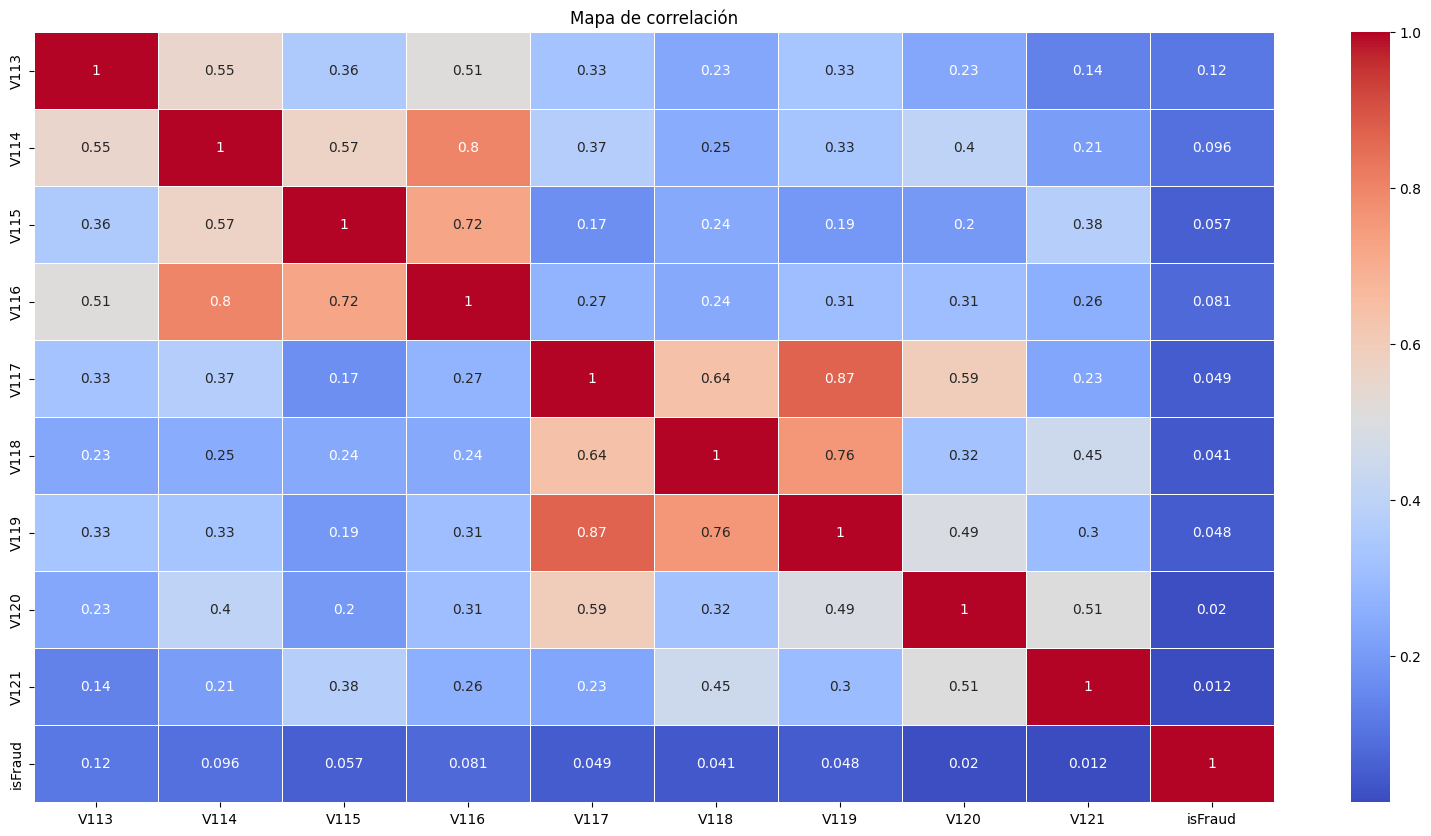

In [103]:
plt.figure(figsize=(20, 10))
sns.heatmap(df17.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [104]:
del df17

## 18/36

In [105]:
df18["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

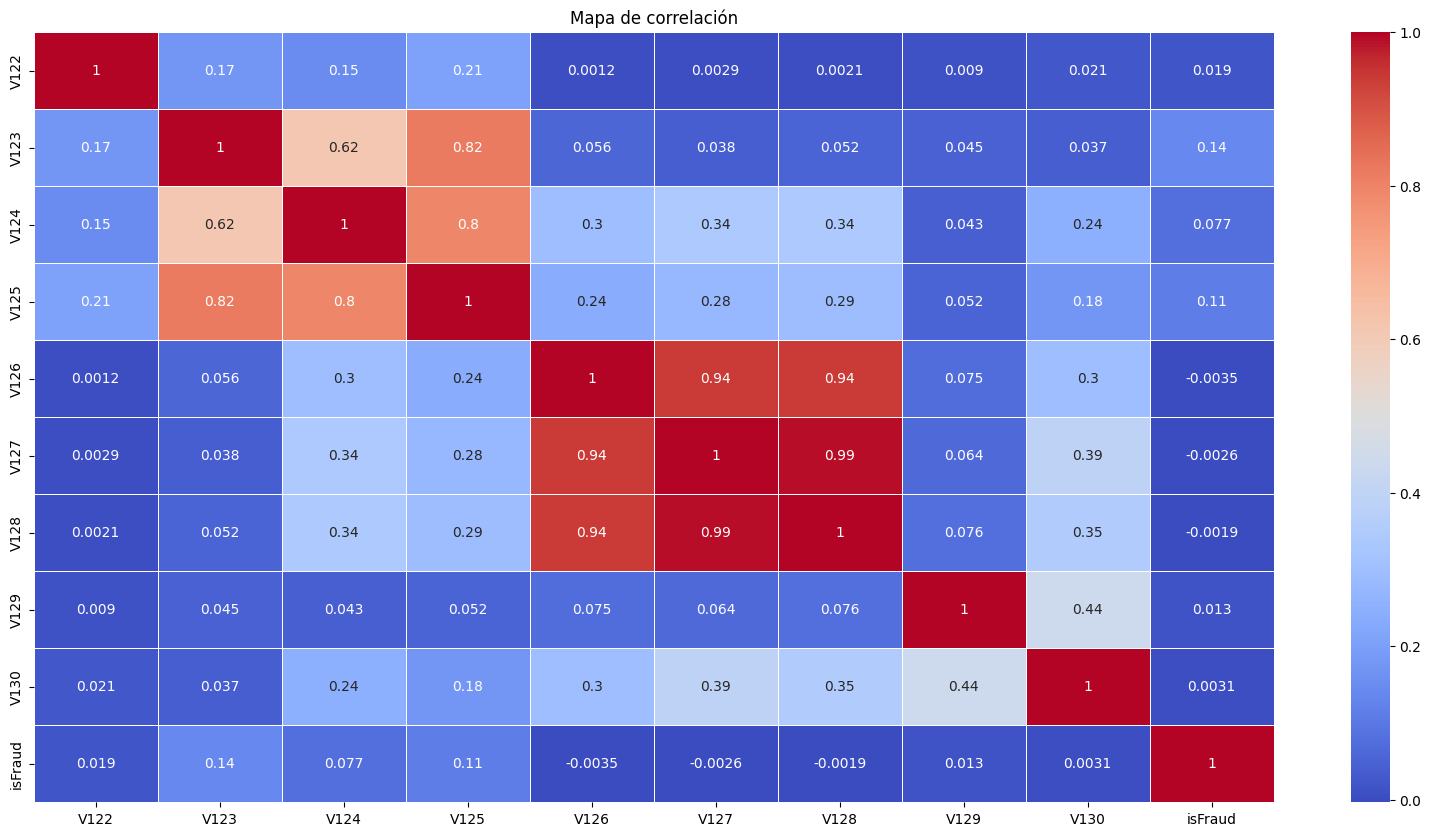

In [106]:
plt.figure(figsize=(20, 10))
sns.heatmap(df18.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [107]:
del df18

## 19/36

In [108]:
df19["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

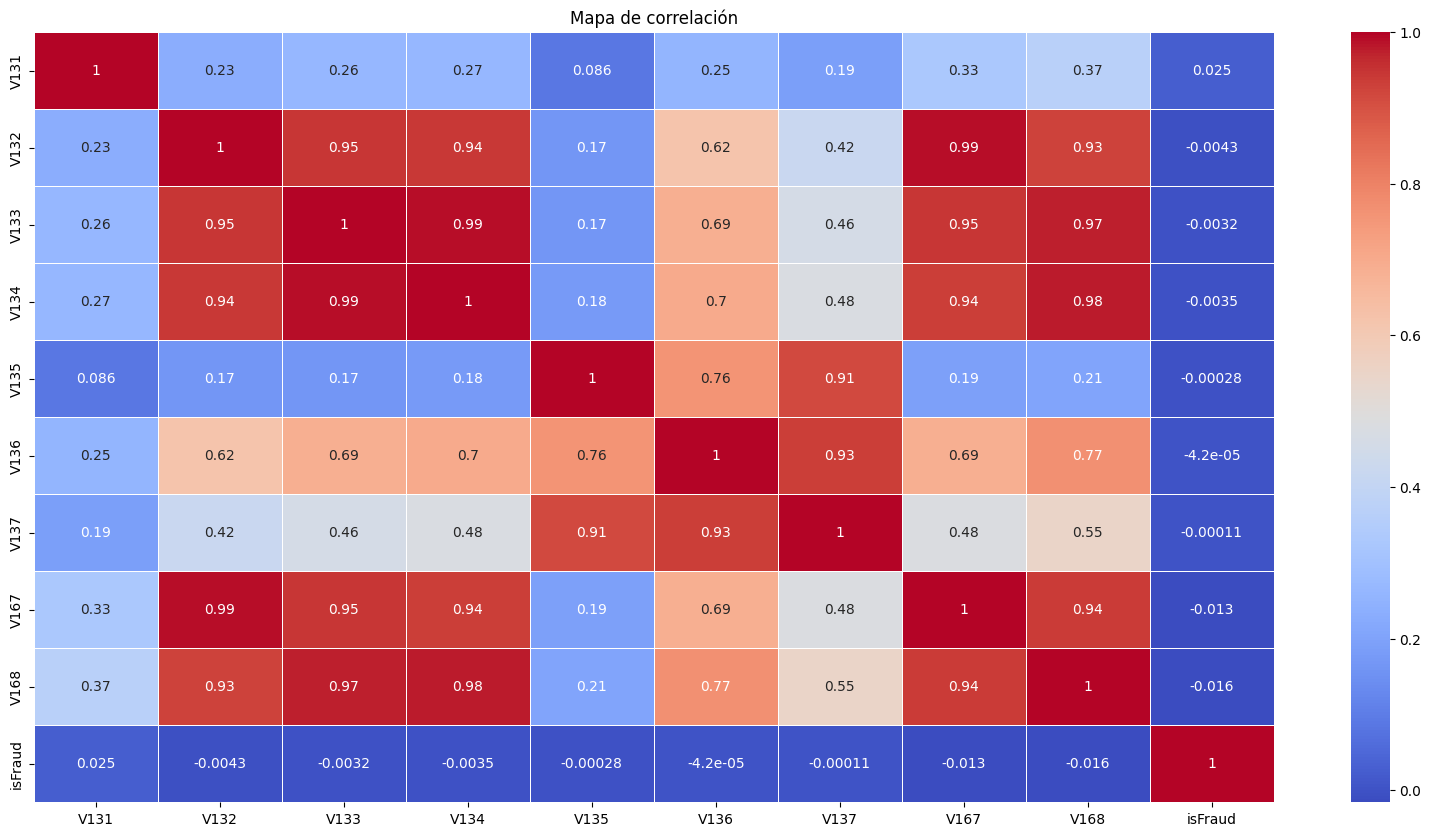

In [109]:
plt.figure(figsize=(20, 10))
sns.heatmap(df19.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [110]:
del df19

## 20/36

In [111]:
df20["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

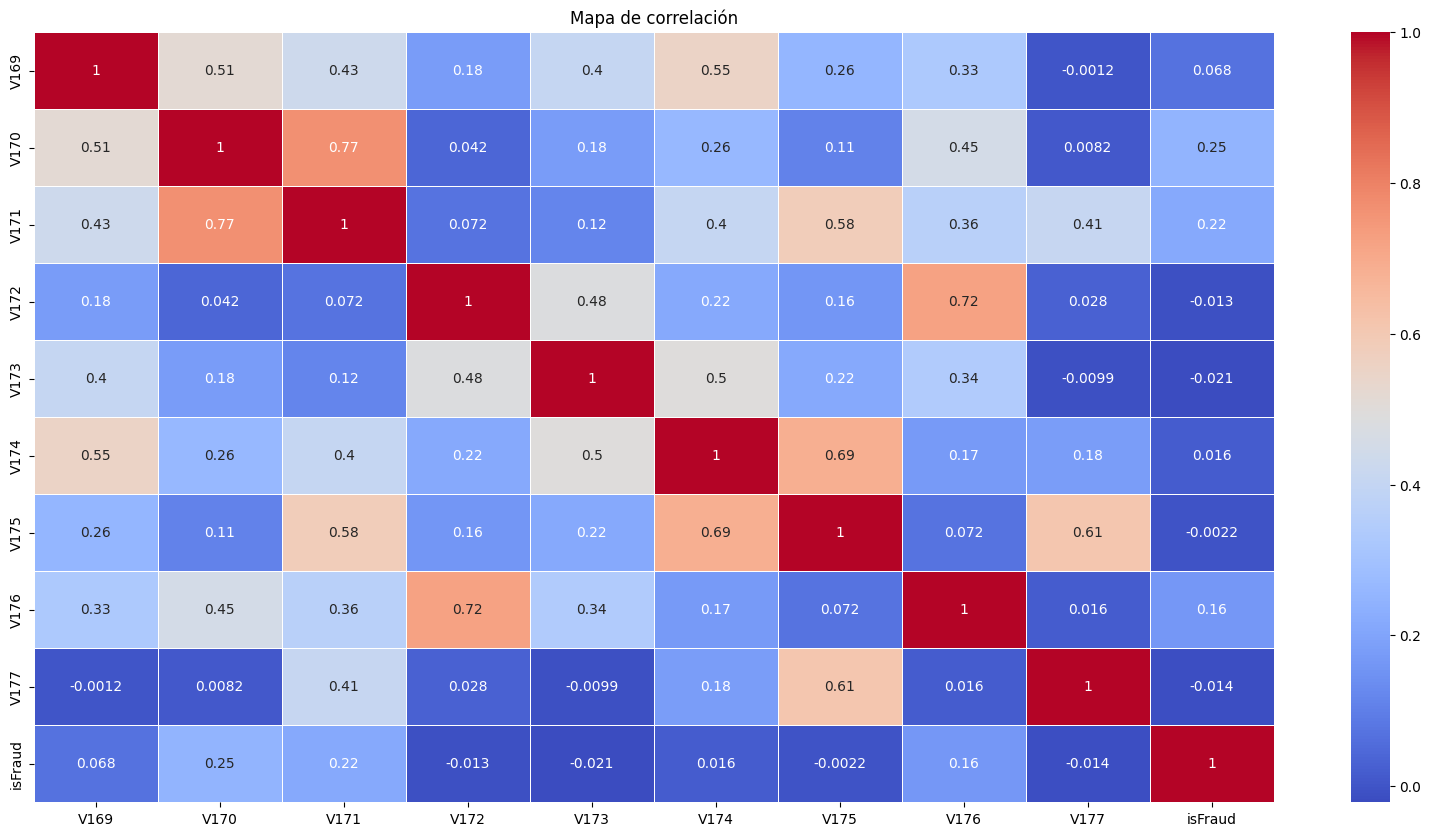

In [112]:
plt.figure(figsize=(20, 10))
sns.heatmap(df20.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [113]:
del df20

## 21/36

In [114]:
df21["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

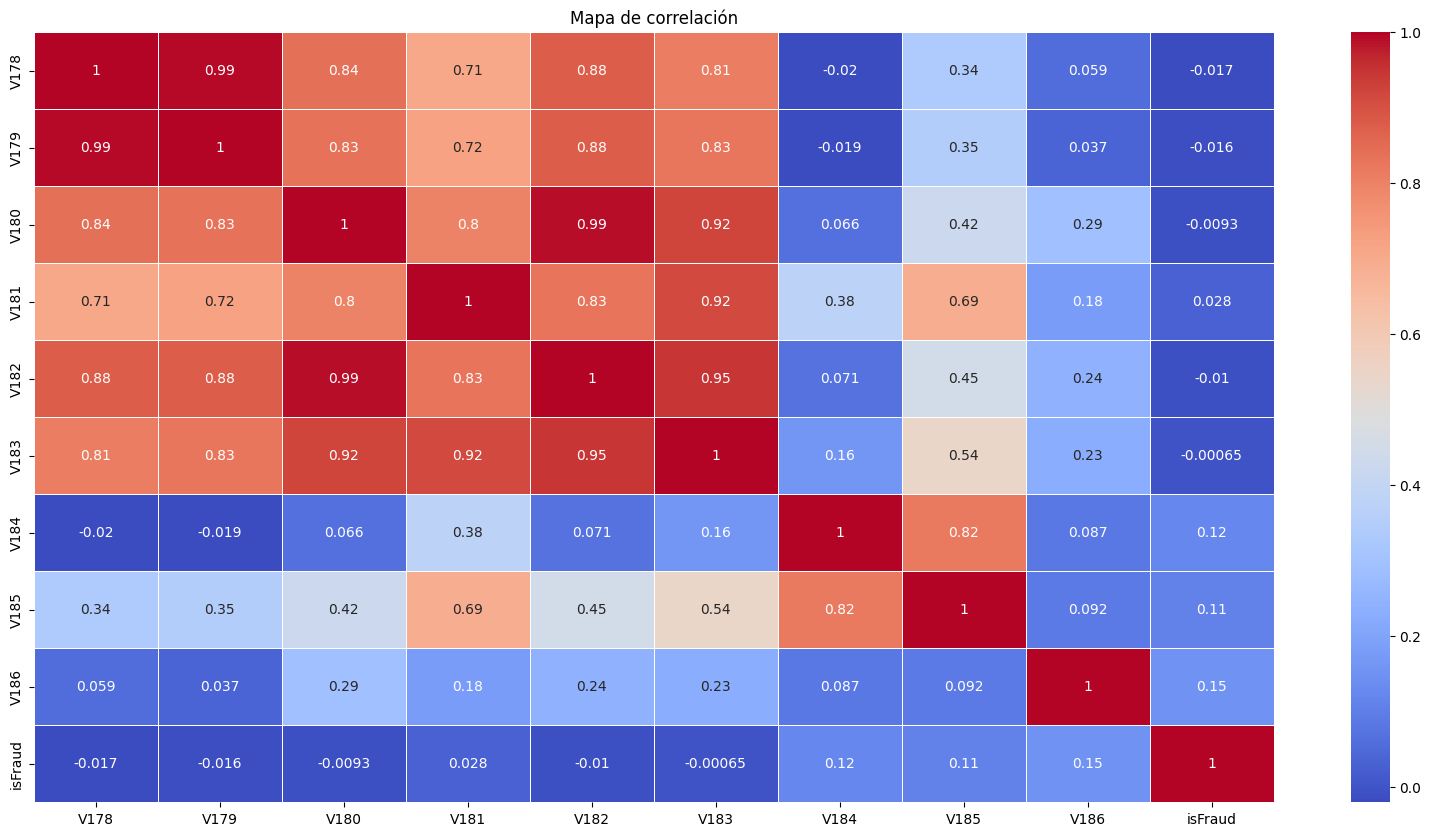

In [115]:
plt.figure(figsize=(20, 10))
sns.heatmap(df21.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [116]:
del df21

## 22/36

In [117]:
df22["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

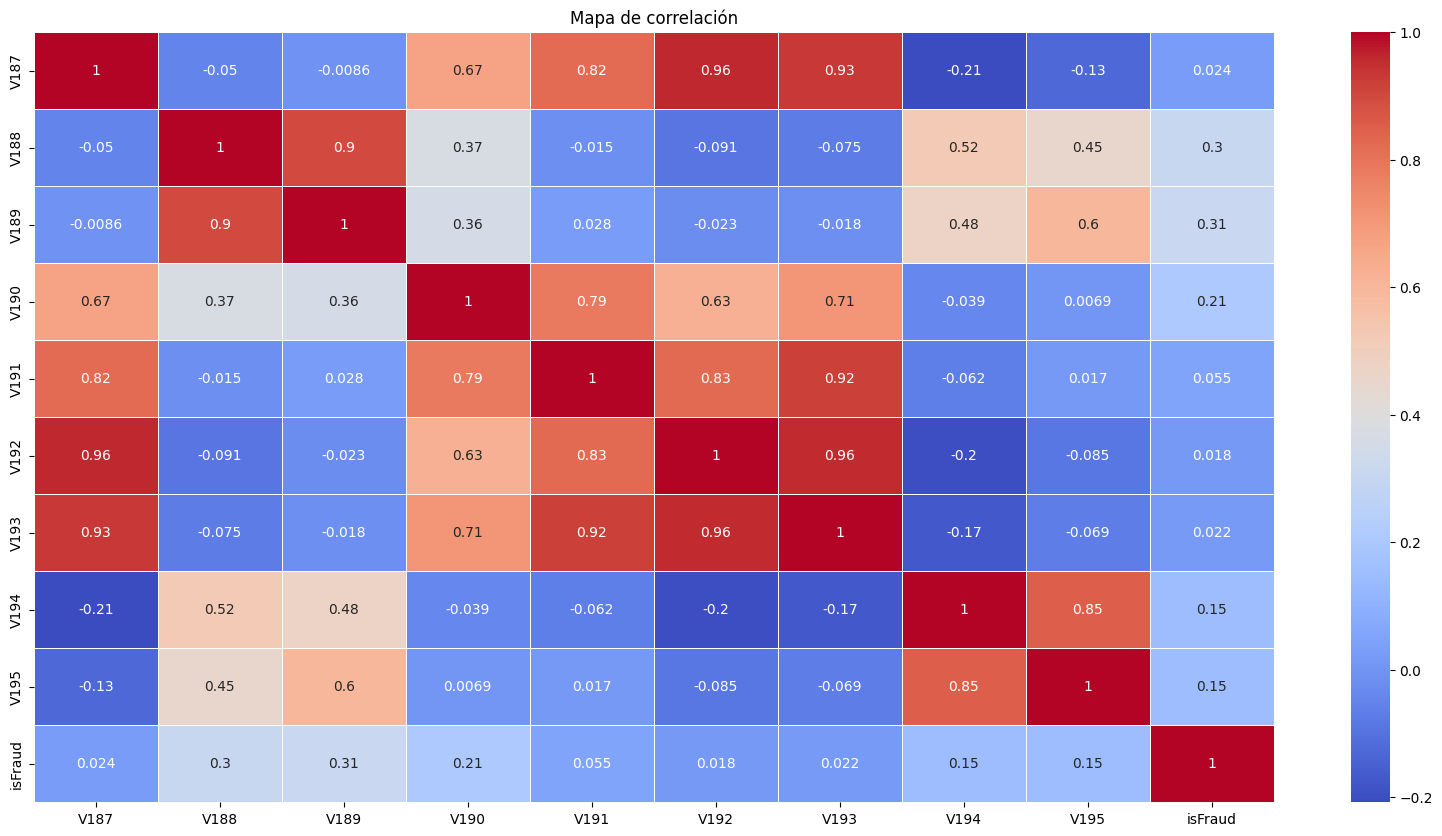

In [118]:
plt.figure(figsize=(20, 10))
sns.heatmap(df22.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [119]:
del df22

## 23/36

In [120]:
df23["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

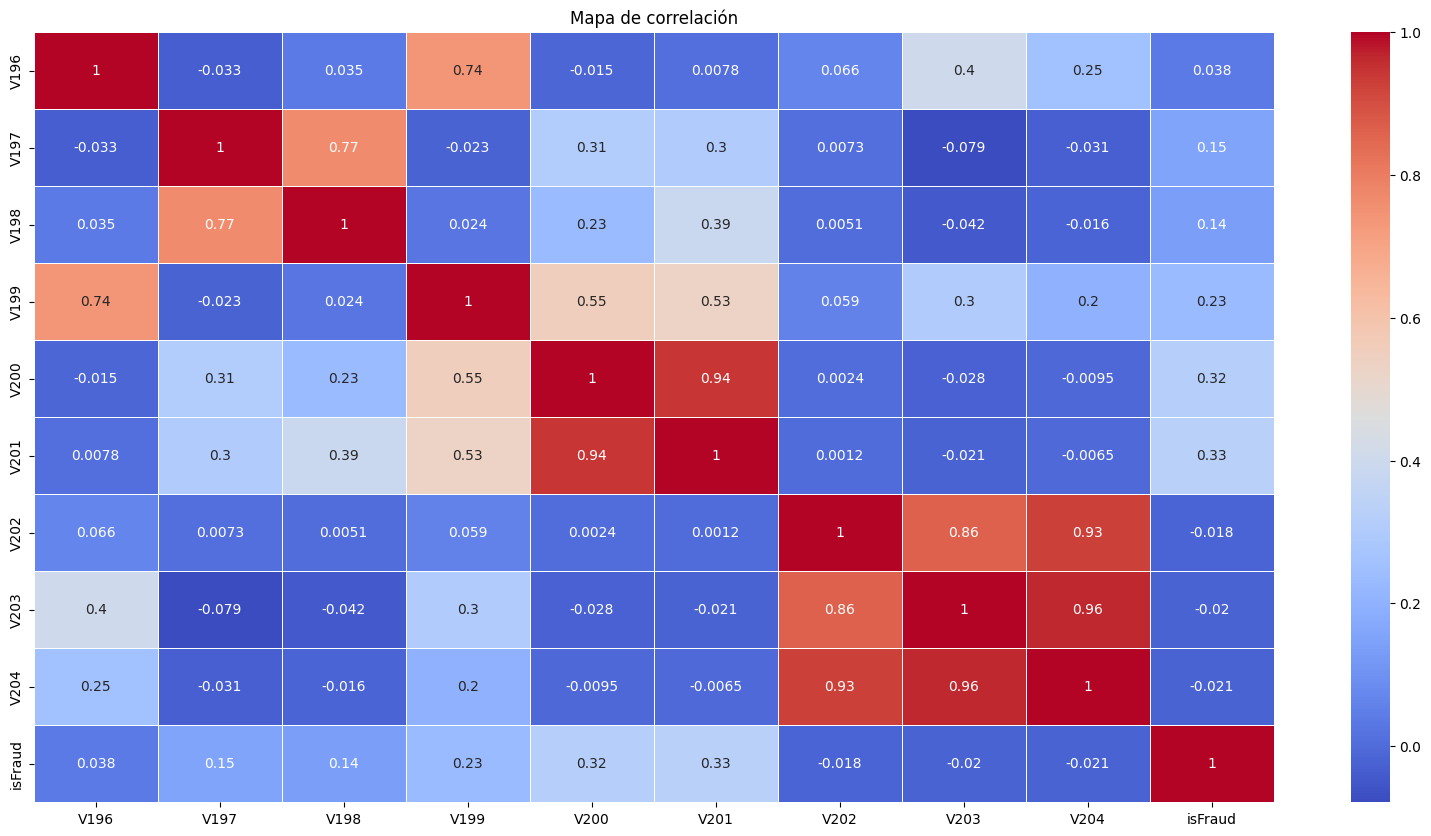

In [121]:
plt.figure(figsize=(20, 10))
sns.heatmap(df23.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [122]:
del df23

## 24/36

In [123]:
df24["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

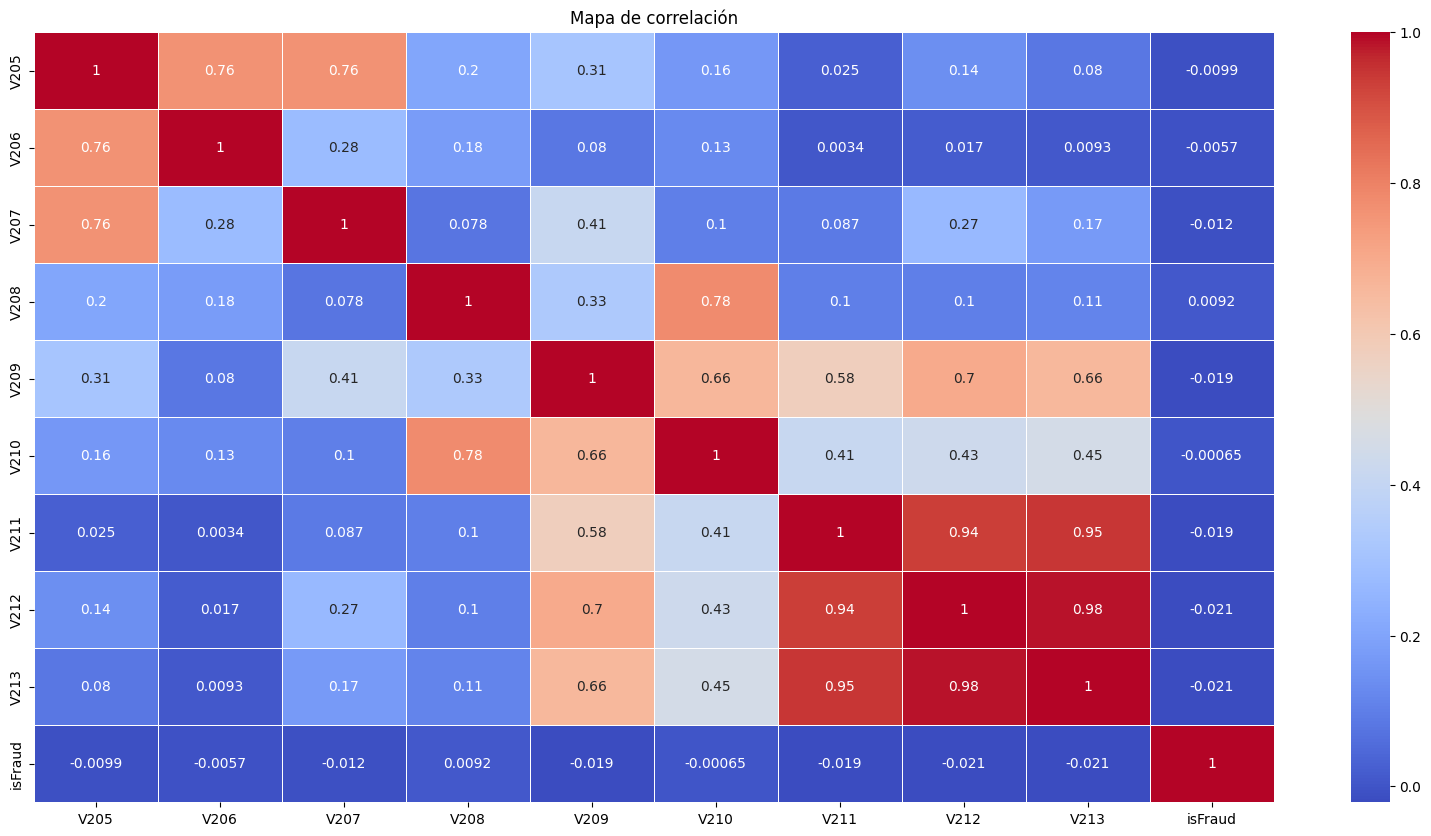

In [124]:
plt.figure(figsize=(20, 10))
sns.heatmap(df24.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

## 25/36

In [125]:
df25["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

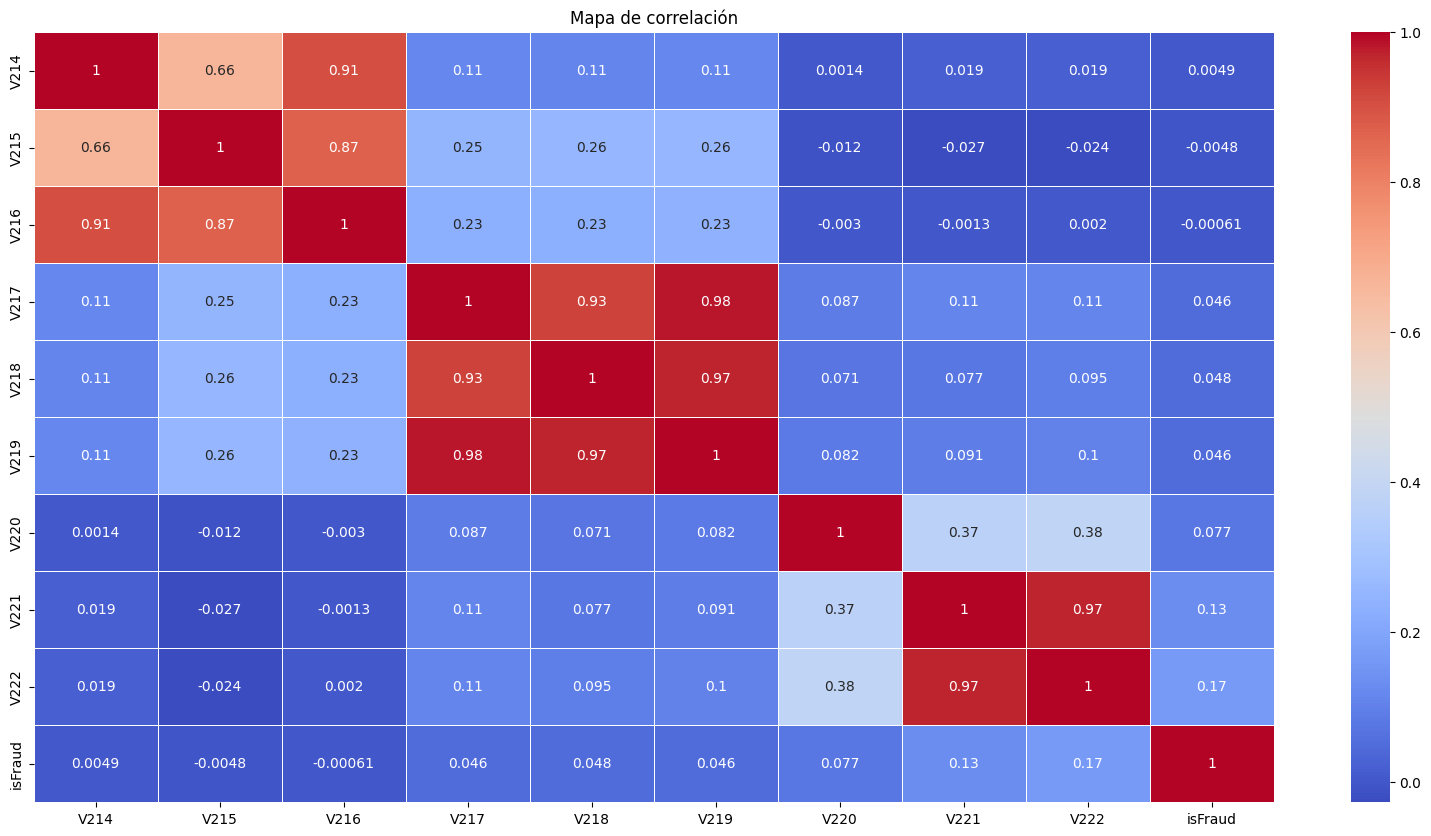

In [126]:
plt.figure(figsize=(20, 10))
sns.heatmap(df25.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [127]:
del df25

## 26/36

In [128]:
df26["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

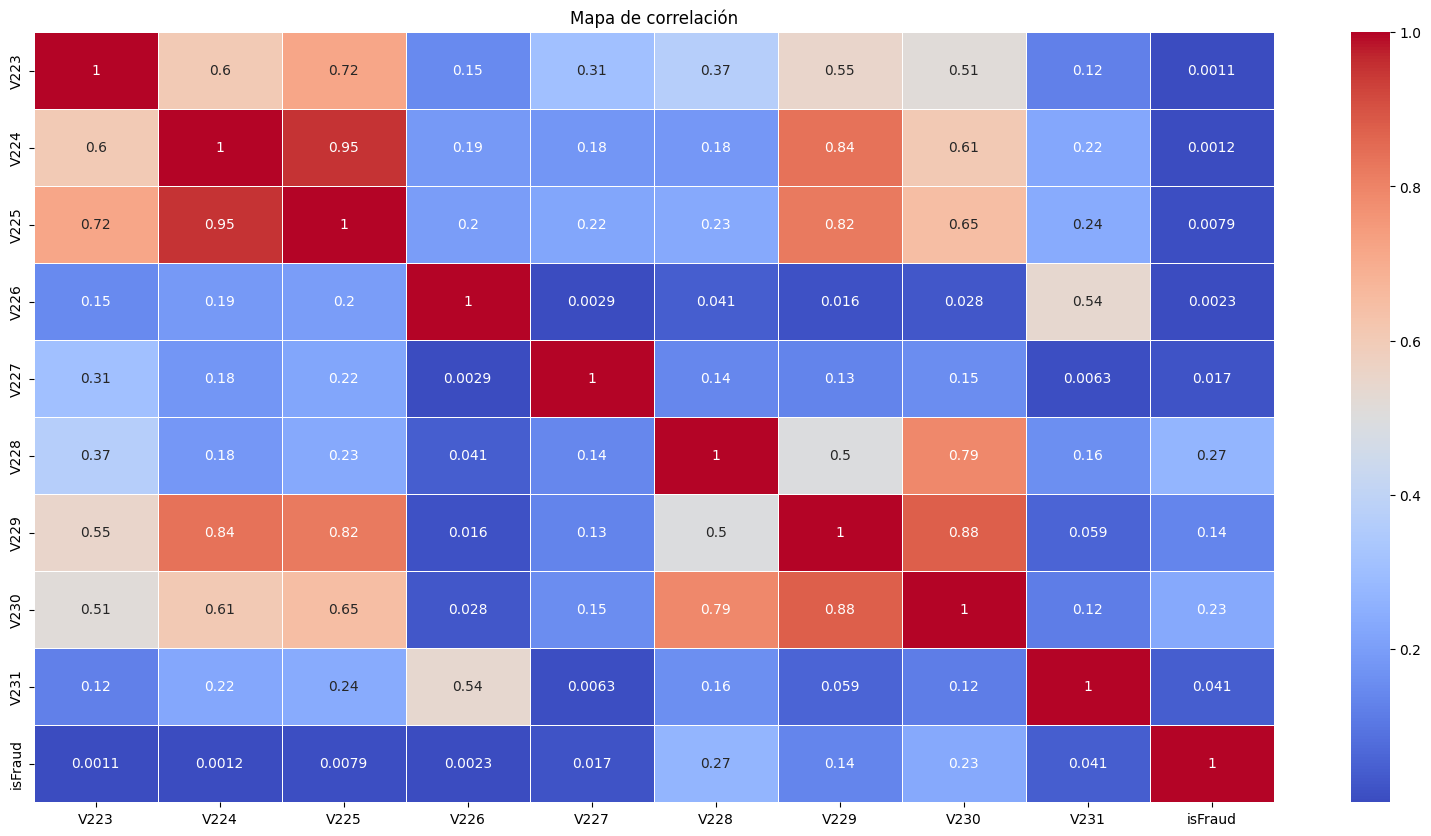

In [129]:
plt.figure(figsize=(20, 10))
sns.heatmap(df26.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [131]:
del df26

## 27/36

In [132]:
df27["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

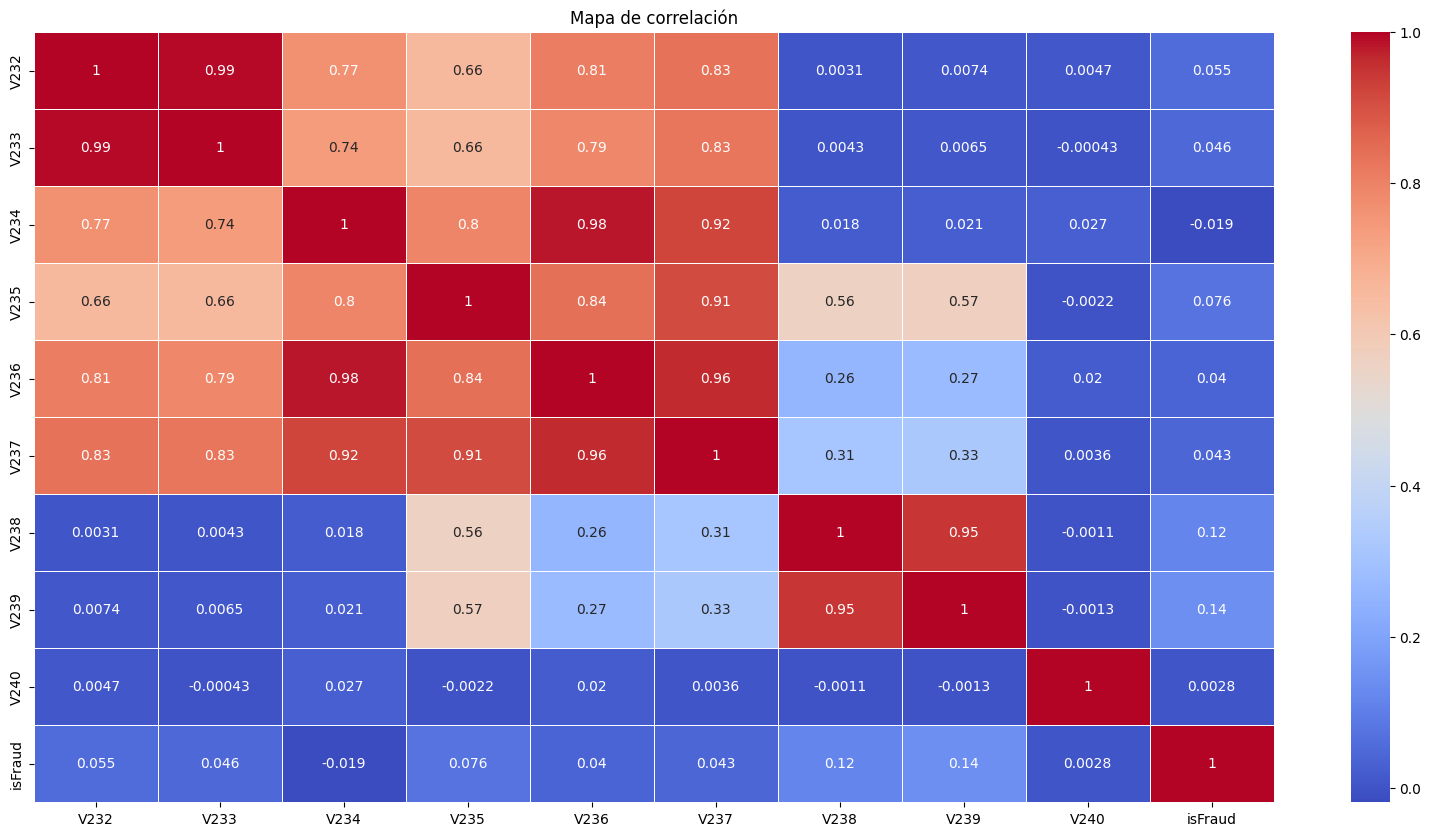

In [133]:
plt.figure(figsize=(20, 10))
sns.heatmap(df27.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [134]:
del df27

## 28/36

In [135]:
df28["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

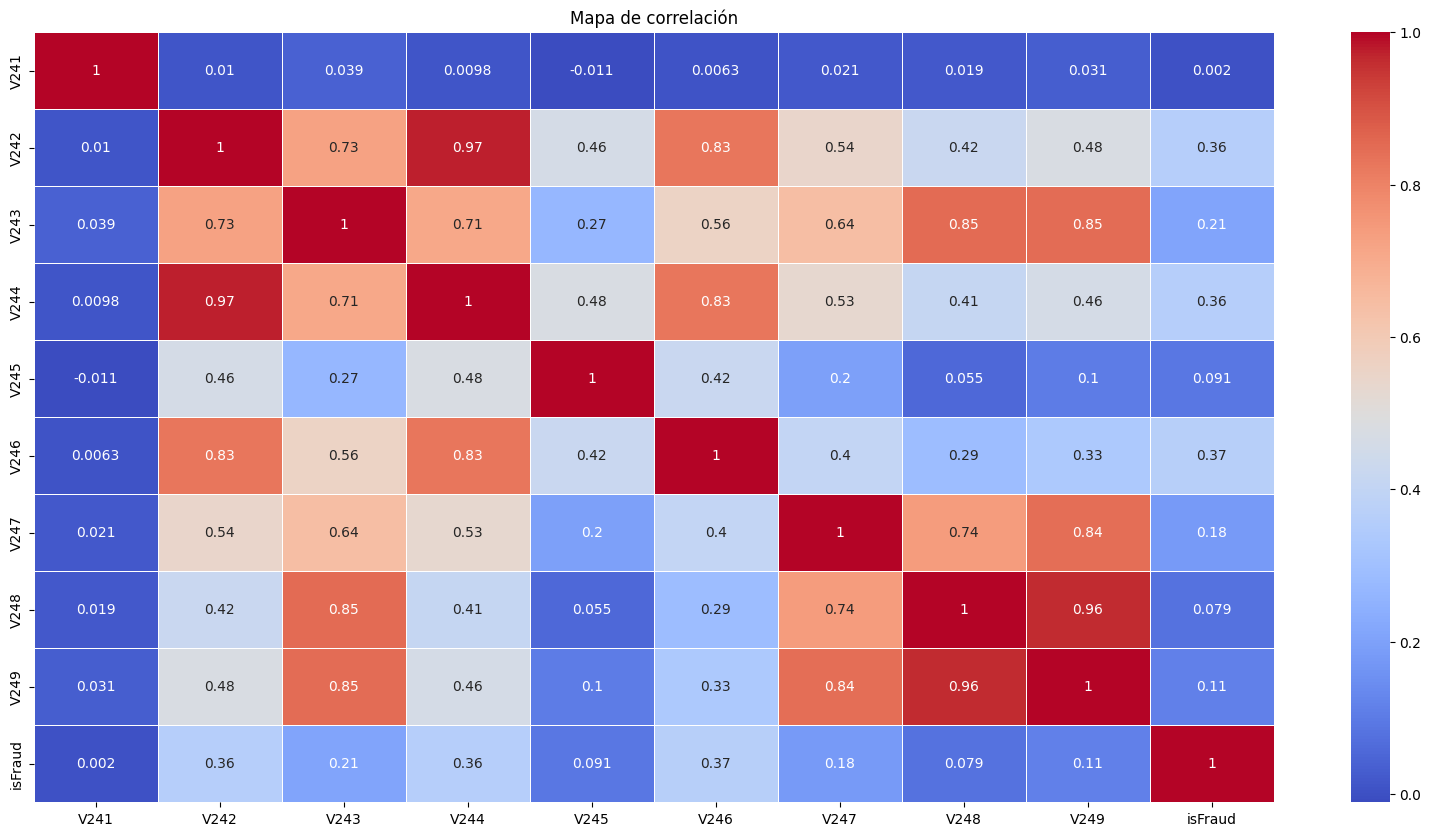

In [136]:
plt.figure(figsize=(20, 10))
sns.heatmap(df28.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [137]:
del df28

## 29/36

In [139]:
df29["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

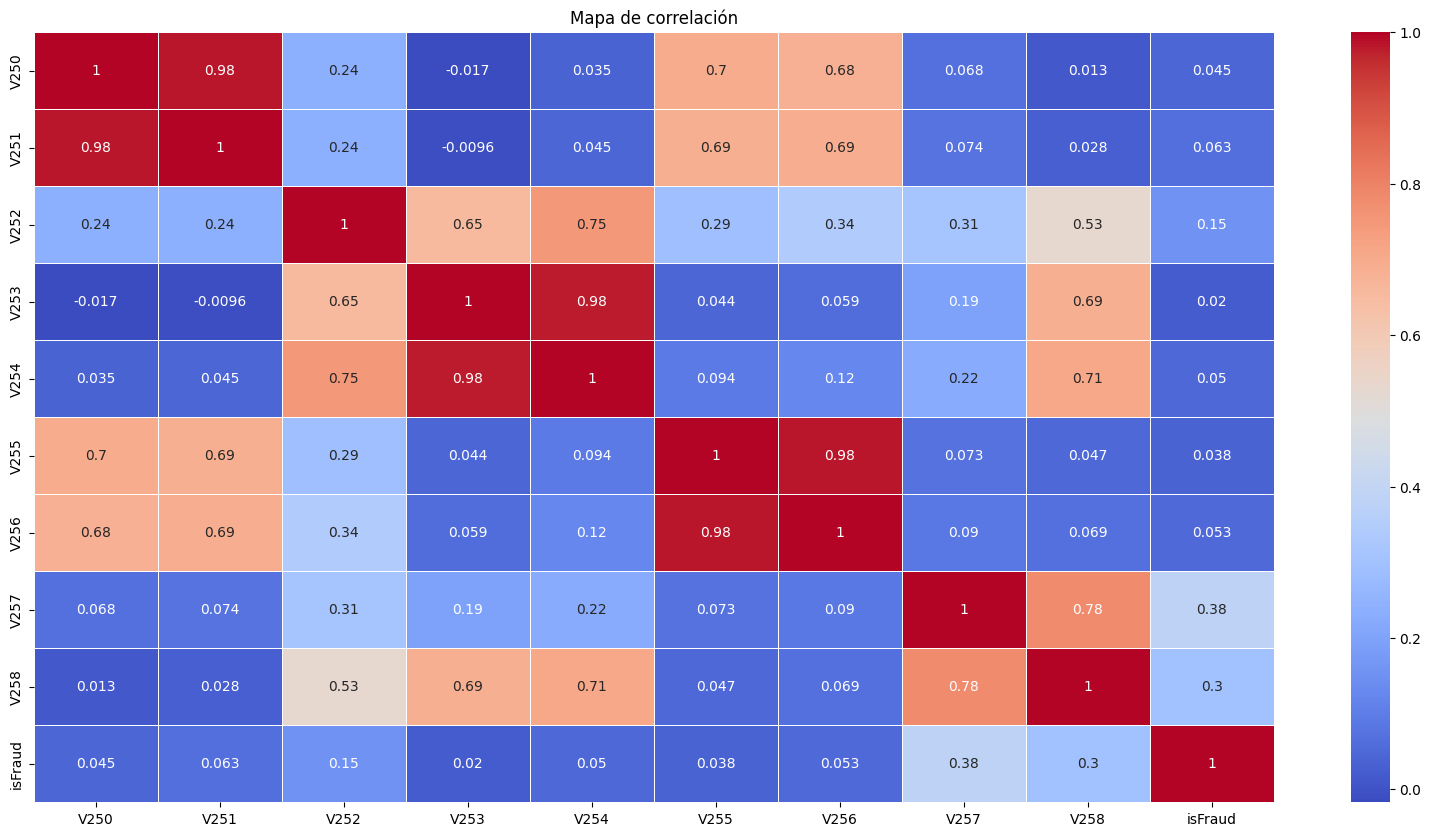

In [140]:
plt.figure(figsize=(20, 10))
sns.heatmap(df29.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [141]:
del df29

## 30/36

In [94]:
df30["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

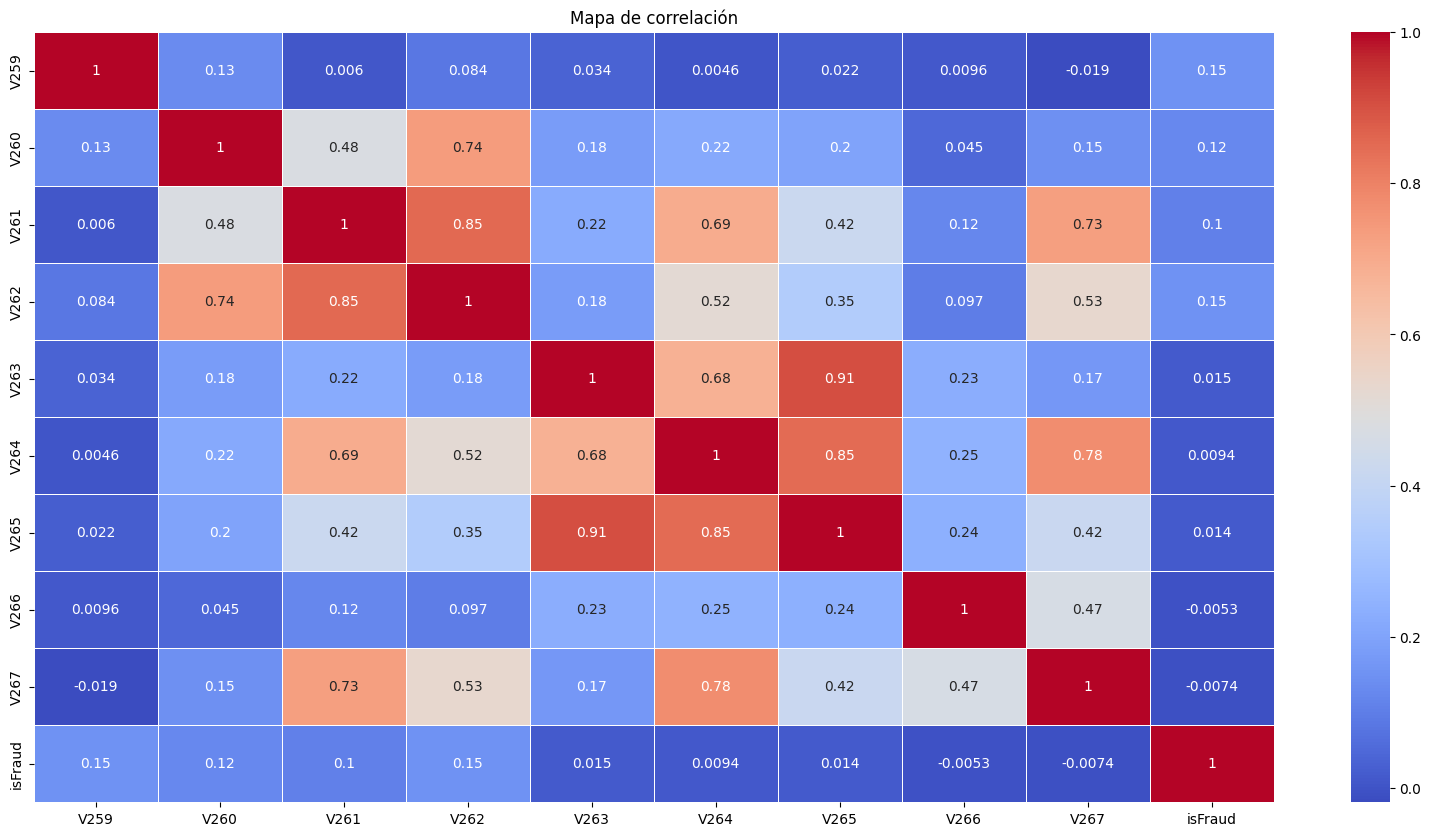

In [95]:
plt.figure(figsize=(20, 10))
sns.heatmap(df30.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [96]:
del df30

## 31/36

In [91]:
df31["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

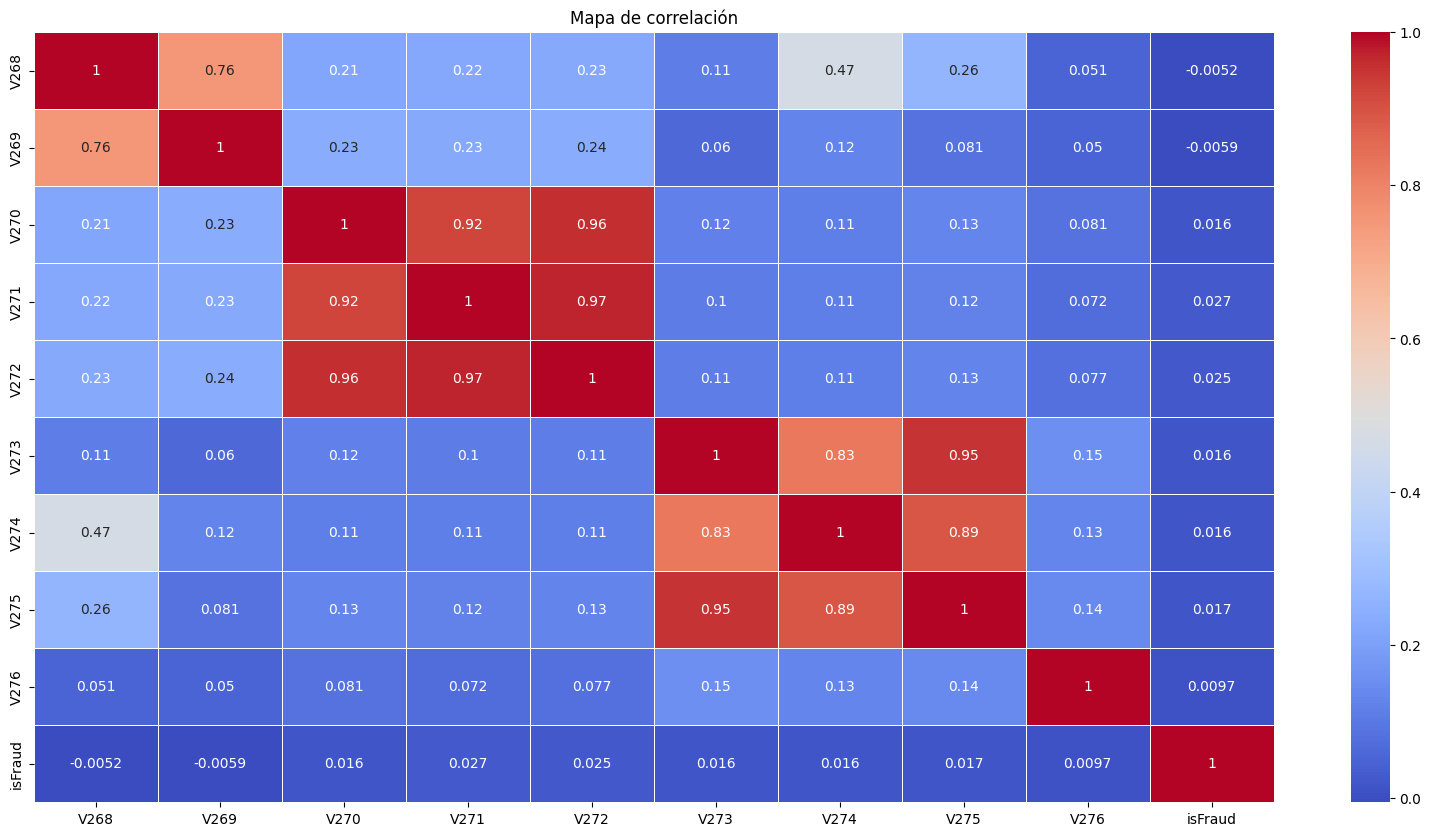

In [92]:
plt.figure(figsize=(20, 10))
sns.heatmap(df31.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [93]:
del df31

## 32/36

In [88]:
df32["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

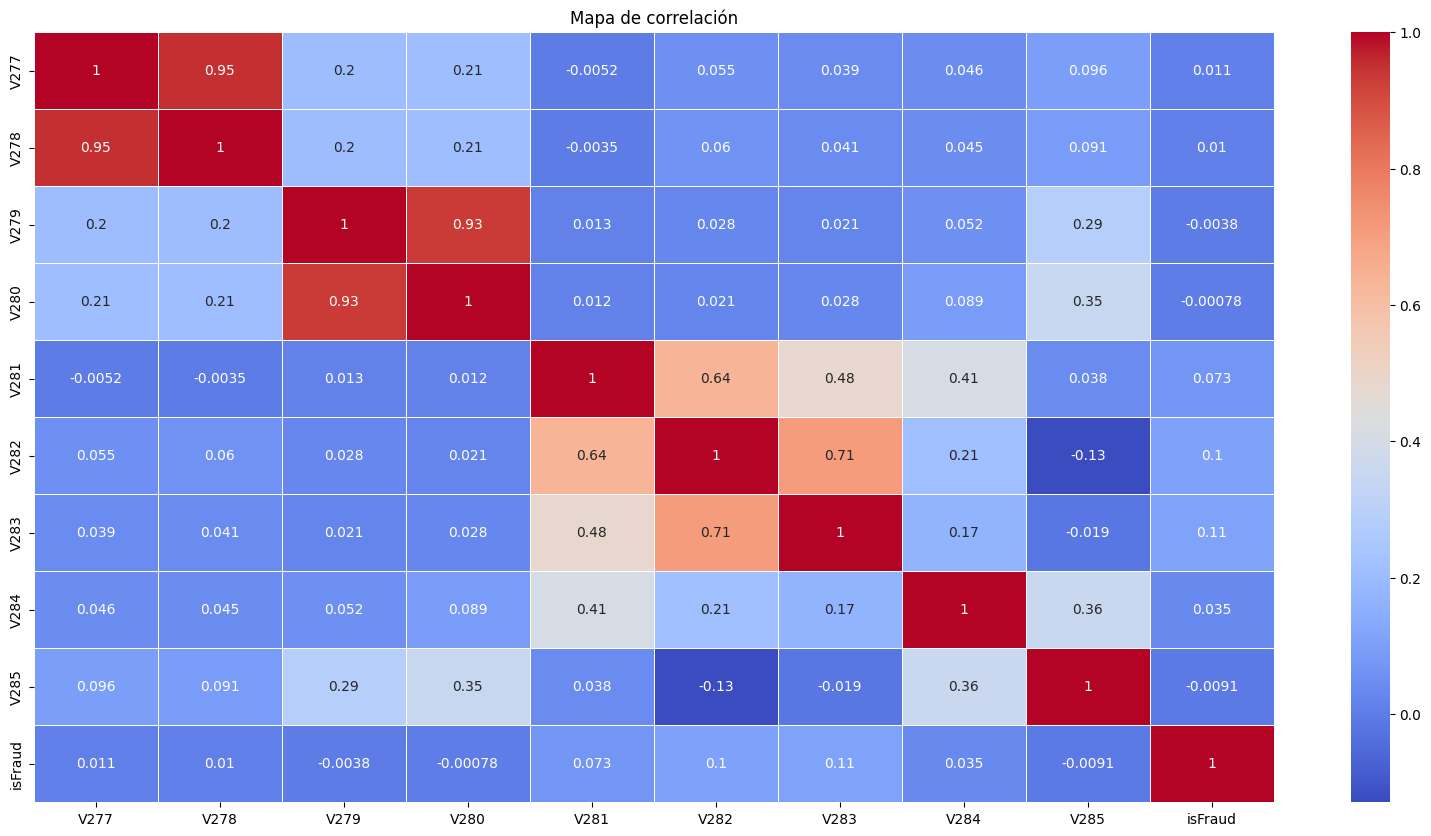

In [89]:
plt.figure(figsize=(20, 10))
sns.heatmap(df32.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [90]:
del df32

## 33/36

In [85]:
df33["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

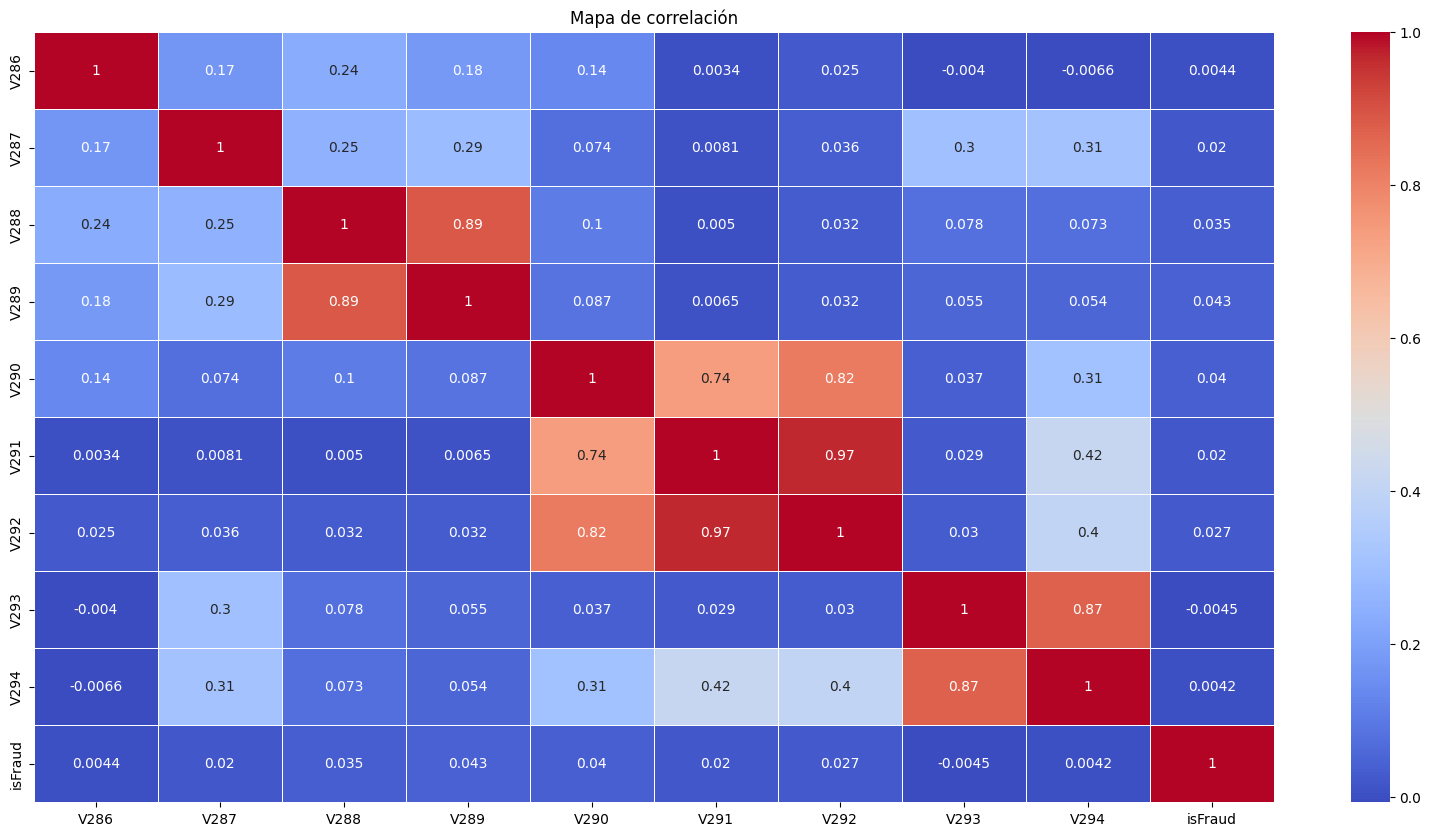

In [86]:
plt.figure(figsize=(20, 10))
sns.heatmap(df33.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [87]:
del df33

## 34/36

In [82]:
df34["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

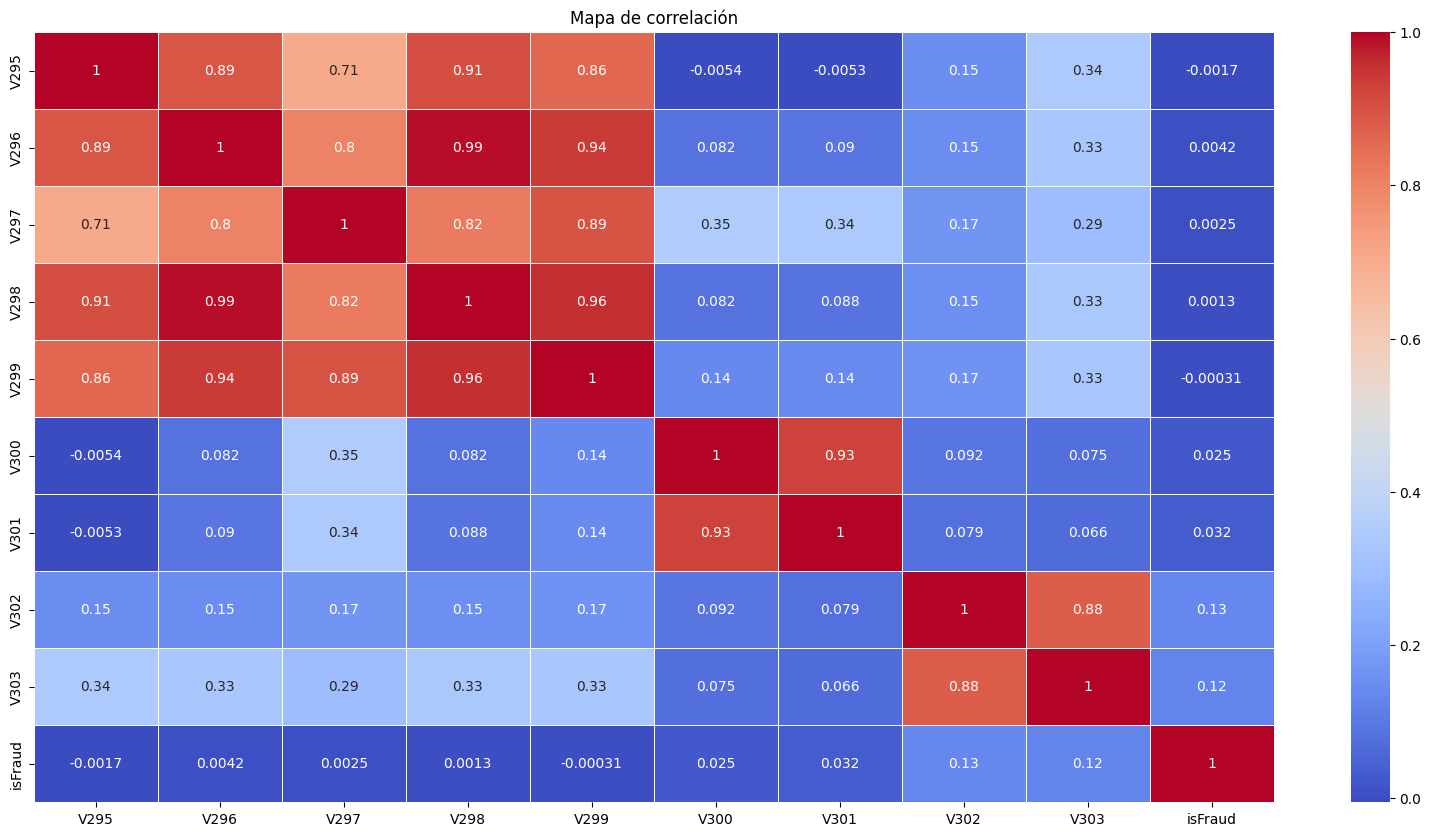

In [83]:
plt.figure(figsize=(20, 10))
sns.heatmap(df34.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [84]:
del df34

## 35/36

In [79]:
df35["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

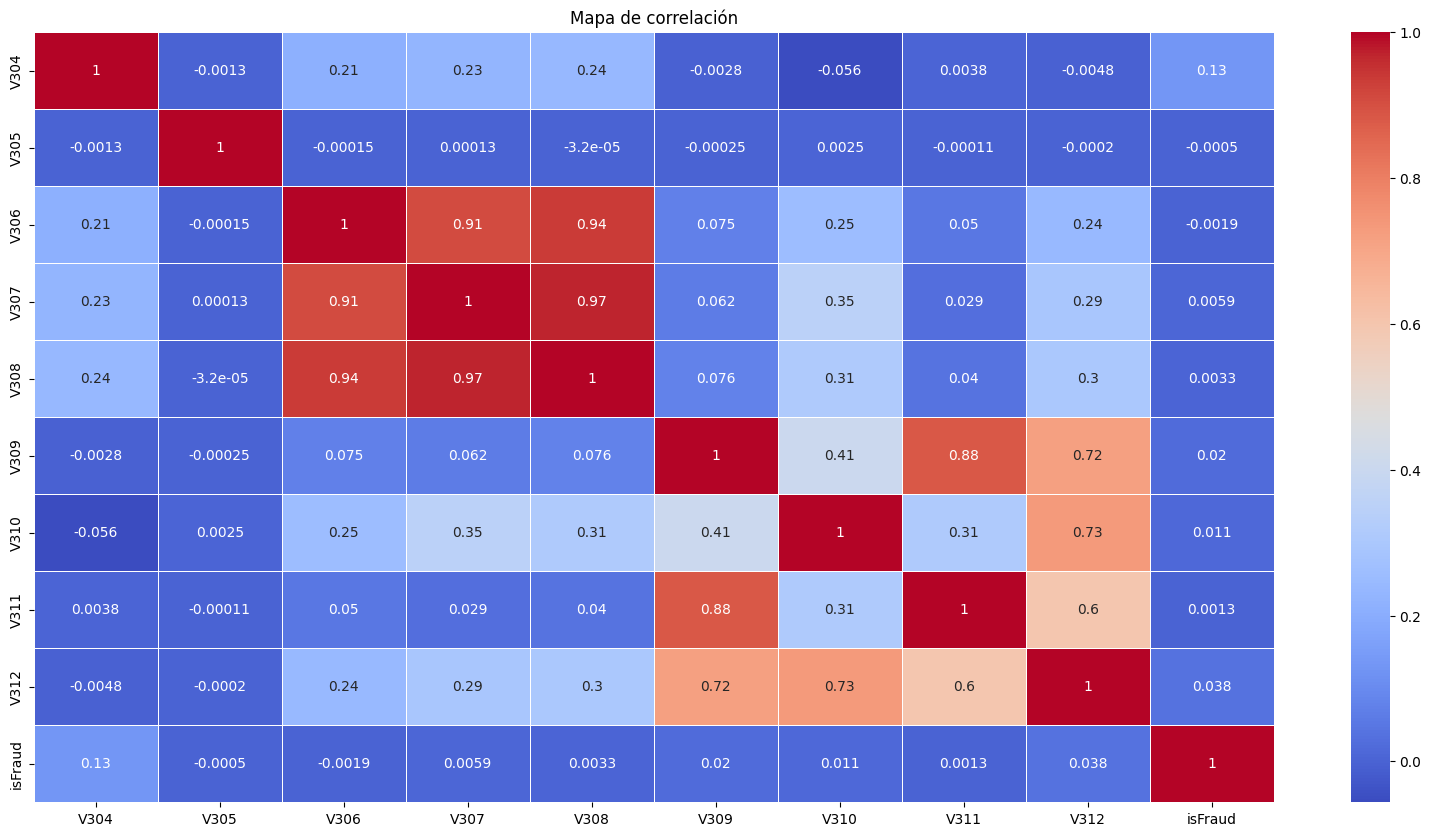

In [80]:
plt.figure(figsize=(20, 10))
sns.heatmap(df35.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [81]:
del df35

## 36/36

In [76]:
df36["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

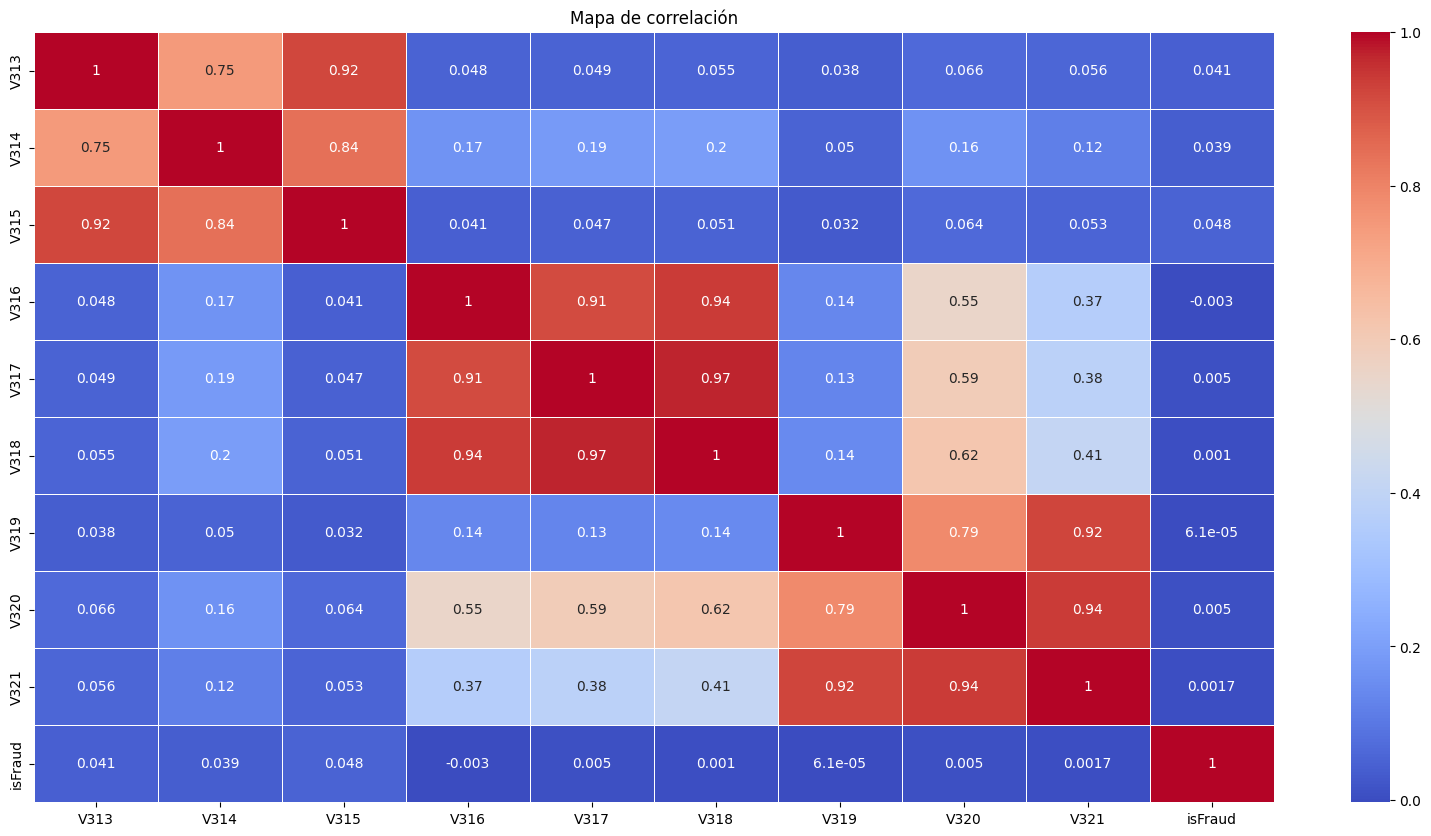

In [77]:
plt.figure(figsize=(20, 10))
sns.heatmap(df36.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [78]:
del df36

<hr>

In [49]:
df_cleaned

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3       card4  card5  ...   V312        V313  \
0       13926    NaN  150.0    discover  142.0  ...    0.0    0.000000   
1        2755  404.0  150.0  mastercard  102.0  ...    0.0    0.000000   
2        4663  490.0  150.0        visa  166.0  ...    0.0    0.000000   
3       18132  567.0  150.0  mastercard  117.0  ...  135.0    0.000000   
4        4497  514.0  150.0  mastercard  102.0  ...    0.0    0.000000   
...       ...    ...    ...         ...    ...  ...    ...         ...   
590535   6550    NaN  150.0        visa  226.0  ...    0.0   47.950001   
590536  10444  225.0  150.0  mastercard  224.0  ...    0.0    0.000000   
590537  12037  595.0  150.0  mastercard  224.0  ...    0.0    0.000000   
590538   7826  481.0  150.0  mastercard  224.0  ...  117.0  317.500000   
590539  15066  170.0  150.0  mastercard  102.0  ...    0.0    0.000000   

              V314        V315  V316    V317   V318        V319        V320  \
0         0.000000    0.000000   0.0   117.0    0.0    0.000000    0.000000   
1         0.000000    0.000000   0.0     0.0    0.0    0.000000    0.000000   
2         0.000000    0.000000   0.0     0.0    0.0    0.000000    0.000000   
3         0.000000    0.000000  50.0  1404.0  790.0    0.000000    0.000000   
4         0.000000    0.000000   0.0     0.0    0.0    0.000000    0.000000   
...            ...         ...   ...     ...    ...         ...         ...   
590535   47.950001   47.950001   0.0     0.0    0.0    0.000000    0.000000   
590536    0.000000    0.000000   0.0     0.0    0.0    0.000000    0.000000   
590537    0.000000    0.000000   0.0     0.0    0.0    0.000000    0.000000   
590538  669.500000  317.500000   0.0  2234.0    0.0    0.000000    0.000000   
590539    0.000000    0.000000   0.0     0.0    0.0  279.950012  279.950012   

              V321  
0         0.000000  
1         0.000000  
2         0.000000  
3         0.000000  
4         0.000000  
...            ...  
590535    0.000000  
590536    0.000000  
590537    0.000000  
590538    0.000000  
590539  279.950012  

[590540 rows x 339 columns]

In [50]:
dr = data_review(df_cleaned)


Total rows:  590540

Total full null rows:  0

Total duplicated rows: 0


In [51]:
dr

Column              dType  No_Null_%  No_Null_Qty  Null_%  \
0     TransactionID    [<class 'int'>]      100.0       590540     0.0   
1           isFraud    [<class 'int'>]      100.0       590540     0.0   
2     TransactionDT    [<class 'int'>]      100.0       590540     0.0   
3    TransactionAmt  [<class 'float'>]      100.0       590540     0.0   
4         ProductCD    [<class 'str'>]      100.0       590540     0.0   
..              ...                ...        ...          ...     ...   
334            V317  [<class 'float'>]      100.0       590528     0.0   
335            V318  [<class 'float'>]      100.0       590528     0.0   
336            V319  [<class 'float'>]      100.0       590528     0.0   
337            V320  [<class 'float'>]      100.0       590528     0.0   
338            V321  [<class 'float'>]      100.0       590528     0.0   

     Null_Qty  
0           0  
1           0  
2           0  
3           0  
4           0  
..        ...  
334        12  
335        12  
336        12  
337        12  
338        12  

[339 rows x 6 columns]

<hr>

In [ ]:
columns_to_drop = dr[dr['Null_%'] != 0]['Column'].tolist()

In [ ]:
columns_to_drop

['card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'dist1',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D10',
 'D11',
 'D15',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',

In [ ]:
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

In [ ]:
text_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()

In [ ]:
text_columns

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [ ]:
df_cleaned[text_columns] = df_cleaned[text_columns].fillna('')

In [ ]:
df_cleaned = df_cleaned.drop(columns=text_columns)

In [ ]:
df_cleaned

TransactionID  isFraud  TransactionDT  TransactionAmt  card1   C1  \
0             2987000        0          86400           68.50  13926  1.0   
1             2987001        0          86401           29.00   2755  1.0   
2             2987002        0          86469           59.00   4663  1.0   
3             2987003        0          86499           50.00  18132  2.0   
4             2987004        0          86506           50.00   4497  1.0   
...               ...      ...            ...             ...    ...  ...   
590535        3577535        0       15811047           49.00   6550  2.0   
590536        3577536        0       15811049           39.50  10444  1.0   
590537        3577537        0       15811079           30.95  12037  1.0   
590538        3577538        0       15811088          117.00   7826  1.0   
590539        3577539        0       15811131          279.95  15066  2.0   

         C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12   C13  C14  \
0       1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0  0.0   1.0  1.0   
1       1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   1.0  1.0   
2       1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0   
3       5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0  0.0  25.0  1.0   
4       1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   1.0  1.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   
590535  1.0  0.0  0.0  1.0  0.0  0.0  0.0  2.0  0.0  1.0  0.0   3.0  2.0   
590536  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0   
590537  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0   
590538  1.0  0.0  0.0  0.0  3.0  0.0  0.0  2.0  0.0  1.0  1.0   5.0  1.0   
590539  1.0  0.0  0.0  1.0  1.0  0.0  0.0  2.0  0.0  1.0  0.0   1.0  1.0   

        V279  V280  V284  V285  V286  V287  V290  V291  V292  V293  V294  \
0        0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0   1.0   
1        0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   
3        1.0  28.0   0.0  10.0   0.0   4.0   1.0   1.0   1.0   1.0  38.0   
4        0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
590535   0.0   0.0   0.0   1.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   
590536   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   
590537   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   
590538   1.0   1.0   1.0   5.0   0.0   1.0   1.0   2.0   1.0   0.0  11.0   
590539   1.0   1.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   

        V295  V297  V298  V299  V302  V303  V304  V305        V306  \
0        0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.000000   
1        0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.000000   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.000000   
3       24.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   50.000000   
4        0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0    0.000000   
...      ...   ...   ...   ...   ...   ...   ...   ...         ...   
590535   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.000000   
590536   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.000000   
590537   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.000000   
590538   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  117.000000   
590539   0.0   1.0   1.0   1.0   0.0   0.0   0.0   1.0  279.950012   

               V307        V308   V309        V310  V311   V312  V316    V317  \
0        117.000000    0.000000    0.0    0.000000   0.0    0.0   0.0   117.0   
1          0.000000    0.000000    0.0    0.000000   0.0    0.0   0.0     0.0   
2          0.000000    0.000000    0.0    0.000000   0.0    0.0   0.0     0.0   
3       1758.000000  925.000000    0.0  354.000000   0.0  135.0  50.0  1404.0   
4          

In [ ]:
del df_cleaned["TransactionID"]

In [ ]:
df_cleaned

isFraud  TransactionDT  TransactionAmt  card1   C1   C2   C3   C4  \
0             0          86400           68.50  13926  1.0  1.0  0.0  0.0   
1             0          86401           29.00   2755  1.0  1.0  0.0  0.0   
2             0          86469           59.00   4663  1.0  1.0  0.0  0.0   
3             0          86499           50.00  18132  2.0  5.0  0.0  0.0   
4             0          86506           50.00   4497  1.0  1.0  0.0  0.0   
...         ...            ...             ...    ...  ...  ...  ...  ...   
590535        0       15811047           49.00   6550  2.0  1.0  0.0  0.0   
590536        0       15811049           39.50  10444  1.0  1.0  0.0  0.0   
590537        0       15811079           30.95  12037  1.0  1.0  0.0  0.0   
590538        0       15811088          117.00   7826  1.0  1.0  0.0  0.0   
590539        0       15811131          279.95  15066  2.0  1.0  0.0  0.0   

         C5   C6   C7   C8   C9  C10  C11  C12   C13  C14  V279  V280  V284  \
0       0.0  1.0  0.0  0.0  1.0  0.0  2.0  0.0   1.0  1.0   0.0   0.0   0.0   
1       0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   1.0  1.0   0.0   0.0   0.0   
2       0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0   0.0   0.0   0.0   
3       0.0  4.0  0.0  0.0  1.0  0.0  1.0  0.0  25.0  1.0   1.0  28.0   0.0   
4       0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   1.0  1.0   0.0   0.0   0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   ...   ...   ...   
590535  1.0  0.0  0.0  0.0  2.0  0.0  1.0  0.0   3.0  2.0   0.0   0.0   0.0   
590536  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0   0.0   0.0   0.0   
590537  1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0   0.0   0.0   0.0   
590538  0.0  3.0  0.0  0.0  2.0  0.0  1.0  1.0   5.0  1.0   1.0   1.0   1.0   
590539  1.0  1.0  0.0  0.0  2.0  0.0  1.0  0.0   1.0  1.0   1.0   1.0   0.0   

        V285  V286  V287  V290  V291  V292  V293  V294  V295  V297  V298  \
0        0.0   0.0   0.0   1.0   1.0   1.0   0.0   1.0   0.0   0.0   0.0   
1        0.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   
2        0.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   
3       10.0   0.0   4.0   1.0   1.0   1.0   1.0  38.0  24.0   0.0   0.0   
4        0.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
590535   1.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   
590536   0.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   
590537   0.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   
590538   5.0   0.0   1.0   1.0   2.0   1.0   0.0  11.0   0.0   0.0   0.0   
590539   0.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   0.0   1.0   1.0   

        V299  V302  V303  V304  V305        V306         V307        V308  \
0        0.0   0.0   0.0   0.0   1.0    0.000000   117.000000    0.000000   
1        0.0   0.0   0.0   0.0   1.0    0.000000     0.000000    0.000000   
2        0.0   0.0   0.0   0.0   1.0    0.000000     0.000000    0.000000   
3        0.0   0.0   0.0   0.0   1.0   50.000000  1758.000000  925.000000   
4        0.0   1.0   1.0   1.0   1.0    0.000000     0.000000    0.000000   
...      ...   ...   ...   ...   ...         ...          ...         ...   
590535   0.0   0.0   0.0   0.0   1.0    0.000000    47.950001    0.000000   
590536   0.0   0.0   0.0   0.0   1.0    0.000000     0.000000    0.000000   
590537   0.0   0.0   0.0   0.0   1.0    0.000000     0.000000    0.000000   
590538   0.0   0.0   0.0   0.0   1.0  117.000000  2903.500000  117.000000   
590539   1.0   0.0   0.0   0.0   1.0  279.950012   279.950012  279.950012   

         V309        V310  V311   V312  V316    V317   V318        V319  \
0         0.0    0.000000   0.0    0.0   0.0   117.0    0.0    0.000000   
1         0.0    0.000000   0.0    0.0   0.0     0.0    0.0    0.000000   
2         0.0    0.000000   0.0    0.0   0.0     0.0    0.0    0.000000

In [ ]:
df_cleaned.to_parquet(r"../data/processed_data/transaction_ml.parquet")

<hr>

In [52]:
df_corr

TransactionID  TransactionDT  TransactionAmt  card1  card2  card3  \
0             2987000          86400           68.50  13926    NaN  150.0   
1             2987001          86401           29.00   2755  404.0  150.0   
2             2987002          86469           59.00   4663  490.0  150.0   
3             2987003          86499           50.00  18132  567.0  150.0   
4             2987004          86506           50.00   4497  514.0  150.0   
...               ...            ...             ...    ...    ...    ...   
590535        3577535       15811047           49.00   6550    NaN  150.0   
590536        3577536       15811049           39.50  10444  225.0  150.0   
590537        3577537       15811079           30.95  12037  595.0  150.0   
590538        3577538       15811088          117.00   7826  481.0  150.0   
590539        3577539       15811131          279.95  15066  170.0  150.0   

        card5  addr1  addr2  dist1  ...   V312        V313        V314  \
0       142.0  315.0   87.0   19.0  ...    0.0    0.000000    0.000000   
1       102.0  325.0   87.0    NaN  ...    0.0    0.000000    0.000000   
2       166.0  330.0   87.0  287.0  ...    0.0    0.000000    0.000000   
3       117.0  476.0   87.0    NaN  ...  135.0    0.000000    0.000000   
4       102.0  420.0   87.0    NaN  ...    0.0    0.000000    0.000000   
...       ...    ...    ...    ...  ...    ...         ...         ...   
590535  226.0  272.0   87.0   48.0  ...    0.0   47.950001   47.950001   
590536  224.0  204.0   87.0    NaN  ...    0.0    0.000000    0.000000   
590537  224.0  231.0   87.0    NaN  ...    0.0    0.000000    0.000000   
590538  224.0  387.0   87.0    3.0  ...  117.0  317.500000  669.500000   
590539  102.0  299.0   87.0    NaN  ...    0.0    0.000000    0.000000   

              V315  V316    V317   V318        V319        V320        V321  
0         0.000000   0.0   117.0    0.0    0.000000    0.000000    0.000000  
1         0.000000   0.0     0.0    0.0    0.000000    0.000000    0.000000  
2         0.000000   0.0     0.0    0.0    0.000000    0.000000    0.000000  
3         0.000000  50.0  1404.0  790.0    0.000000    0.000000    0.000000  
4         0.000000   0.0     0.0    0.0    0.000000    0.000000    0.000000  
...            ...   ...     ...    ...         ...         ...         ...  
590535   47.950001   0.0     0.0    0.0    0.000000    0.000000    0.000000  
590536    0.000000   0.0     0.0    0.0    0.000000    0.000000    0.000000  
590537    0.000000   0.0     0.0    0.0    0.000000    0.000000    0.000000  
590538  317.500000   0.0  2234.0    0.0    0.000000    0.000000    0.000000  
590539    0.000000   0.0     0.0    0.0  279.950012  279.950012  279.950012  

[590540 rows x 324 columns]

In [53]:
df_corr.insert(1,column="isFraud",value=Y)

In [54]:
df_corr

TransactionID  isFraud  TransactionDT  TransactionAmt  card1  card2  \
0             2987000        0          86400           68.50  13926    NaN   
1             2987001        0          86401           29.00   2755  404.0   
2             2987002        0          86469           59.00   4663  490.0   
3             2987003        0          86499           50.00  18132  567.0   
4             2987004        0          86506           50.00   4497  514.0   
...               ...      ...            ...             ...    ...    ...   
590535        3577535        0       15811047           49.00   6550    NaN   
590536        3577536        0       15811049           39.50  10444  225.0   
590537        3577537        0       15811079           30.95  12037  595.0   
590538        3577538        0       15811088          117.00   7826  481.0   
590539        3577539        0       15811131          279.95  15066  170.0   

        card3  card5  addr1  addr2  ...   V312        V313        V314  \
0       150.0  142.0  315.0   87.0  ...    0.0    0.000000    0.000000   
1       150.0  102.0  325.0   87.0  ...    0.0    0.000000    0.000000   
2       150.0  166.0  330.0   87.0  ...    0.0    0.000000    0.000000   
3       150.0  117.0  476.0   87.0  ...  135.0    0.000000    0.000000   
4       150.0  102.0  420.0   87.0  ...    0.0    0.000000    0.000000   
...       ...    ...    ...    ...  ...    ...         ...         ...   
590535  150.0  226.0  272.0   87.0  ...    0.0   47.950001   47.950001   
590536  150.0  224.0  204.0   87.0  ...    0.0    0.000000    0.000000   
590537  150.0  224.0  231.0   87.0  ...    0.0    0.000000    0.000000   
590538  150.0  224.0  387.0   87.0  ...  117.0  317.500000  669.500000   
590539  150.0  102.0  299.0   87.0  ...    0.0    0.000000    0.000000   

              V315  V316    V317   V318        V319        V320        V321  
0         0.000000   0.0   117.0    0.0    0.000000    0.000000    0.000000  
1         0.000000   0.0     0.0    0.0    0.000000    0.000000    0.000000  
2         0.000000   0.0     0.0    0.0    0.000000    0.000000    0.000000  
3         0.000000  50.0  1404.0  790.0    0.000000    0.000000    0.000000  
4         0.000000   0.0     0.0    0.0    0.000000    0.000000    0.000000  
...            ...   ...     ...    ...         ...         ...         ...  
590535   47.950001   0.0     0.0    0.0    0.000000    0.000000    0.000000  
590536    0.000000   0.0     0.0    0.0    0.000000    0.000000    0.000000  
590537    0.000000   0.0     0.0    0.0    0.000000    0.000000    0.000000  
590538  317.500000   0.0  2234.0    0.0    0.000000    0.000000    0.000000  
590539    0.000000   0.0     0.0    0.0  279.950012  279.950012  279.950012  

[590540 rows x 325 columns]

In [55]:
fraudes = df_corr[df_corr["isFraud"] == 1]

In [56]:
no_fraudes = df_corr[df_corr["isFraud"] != 1]

In [57]:
del df_corr

In [67]:
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)

In [68]:
data_review(fraudes)


Total rows:  20663

Total full null rows:  0

Total duplicated rows: 10678


Column              dType  No_Null_%  No_Null_Qty  Null_%  Null_Qty
0    isFraud    [<class 'int'>]     100.00        20663    0.00         0
1      card3  [<class 'float'>]      99.81        20624    0.19        39
2        V15  [<class 'float'>]      81.19        16776   18.81      3887
3        V16  [<class 'float'>]      81.19        16776   18.81      3887
4        V17  [<class 'float'>]      81.19        16776   18.81      3887
5        V18  [<class 'float'>]      81.19        16776   18.81      3887
6        V21  [<class 'float'>]      81.19        16776   18.81      3887
7        V22  [<class 'float'>]      81.19        16776   18.81      3887
8        V23  [<class 'float'>]      81.19        16776   18.81      3887
9        V24  [<class 'float'>]      81.19        16776   18.81      3887
10       V29  [<class 'float'>]      81.19        16776   18.81      3887
11       V30  [<class 'float'>]      81.19        16776   18.81      3887
12       V31  [<class 'float'>]      81.19        16776   18.81      3887
13       V32  [<class 'float'>]      81.19        16776   18.81      3887
14       V33  [<class 'float'>]      81.19        16776   18.81      3887
15       V34  [<class 'float'>]      81.19        16776   18.81      3887
16       V37  [<class 'float'>]      70.50        14567   29.50      6096
17       V38  [<class 'float'>]      70.50        14567   29.50      6096
18       V39  [<class 'float'>]      70.50        14567   29.50      6096
19       V40  [<class 'float'>]      70.50        14567   29.50      6096
20       V42  [<class 'float'>]      70.50        14567   29.50      6096
21       V43  [<class 'float'>]      70.50        14567   29.50      6096
22       V44  [<class 'float'>]      70.50        14567   29.50      6096
23       V45  [<class 'float'>]      70.50        14567   29.50      6096
24       V46  [<class 'float'>]      70.50        14567   29.50      6096
25       V47  [<class 'float'>]      70.50        14567   29.50      6096
26       V48  [<class 'float'>]      70.50        14567   29.50      6096
27       V49  [<class 'float'>]      70.50        14567   29.50      6096
28       V50  [<class 'float'>]      70.50        14567   29.50      6096
29       V51  [<class 'float'>]      70.50        14567   29.50      6096
30       V52  [<class 'float'>]      70.50        14567   29.50      6096
31       V57  [<class 'float'>]      78.18        16154   21.82      4509
32       V58  [<class 'float'>]      78.18        16154   21.82      4509
33       V59  [<class 'float'>]      78.18        16154   21.82      4509
34       V60  [<class 'float'>]      78.18        16154   21.82      4509
35       V63  [<class 'float'>]      78.18        16154   21.82      4509
36       V64  [<class 'float'>]      78.18        16154   21.82      4509
37       V69  [<class 'float'>]      78.18        16154   21.82      4509
38       V70  [<class 'float'>]      78.18        16154   21.82      4509
39       V71  [<class 'float'>]      78.18        16154   21.82      4509
40       V72  [<class 'float'>]      78.18        16154   21.82      4509
41       V73  [<class 'float'>]      78.18        16154   21.82      4509
42       V74  [<class 'float'>]      78.18        16154   21.82      4509
43       V77  [<class 'float'>]      79.31        16387   20.69      4276
44       V78  [<class 'float'>]      79.31        16387   20.69      4276
45       V79  [<class 'float'>]      79.31        16387   20.69      4276
46       V80  [<class 'float'>]      79.31        16387   20.69      4276
47       V81  [<class 'float'>]      79.31        16387   20.69      4276
48       V84  [<class 'float'>]      79.31        16387   20.69      4276
49       V85  [<class 'float'>]      79.31        16387   20.69      4276
50       V86  [<class 'float'>]      79.31        16387   20.69      4276
51       V87  [<class 'float'>]      79.31        16387   20.69      4276
52       V90  [<class 'float'>]      79.31        16387   20.69      4276
53       V

In [74]:
fraudes.shape #dropna = 5410

isFraud  card3  V15  V16  V17  V18  V21  V22  V23  V24  V29  V30  V31  \
243           1  185.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  0.0  0.0  1.0   
245           1  185.0  1.0  1.0  1.0  1.0  1.0  1.0  3.0  3.0  0.0  0.0  1.0   
288           1  185.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
405           1  185.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
630           1  185.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
...         ...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
590087        1  185.0  1.0  1.0  1.0  1.0  1.0  1.0  4.0  4.0  0.0  0.0  1.0   
590092        1  185.0  1.0  1.0  1.0  1.0  1.0  1.0  5.0  5.0  0.0  0.0  1.0   
590103        1  185.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
590147        1  185.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
590364        1  185.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   

        V32  V33  V34  V37  V38  V39  V40  V42  V43  V44  V45  V46  V47  V48  \
243     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  1.0  1.0  0.0   
245     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  3.0  3.0  1.0  1.0  0.0   
288     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
405     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
630     1.0  1.0  1.0  1.0  2.0  1.0  2.0  1.0  2.0  1.0  1.0  1.0  1.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
590087  1.0  1.0  1.0  2.0  2.0  1.0  1.0  1.0  1.0  7.0  7.0  1.0  1.0  0.0   
590092  1.0  1.0  1.0  2.0  2.0  1.0  1.0  1.0  1.0  7.0  7.0  1.0  1.0  0.0   
590103  1.0  1.0  1.0  2.0  2.0  1.0  1.0  1.0  1.0  7.0  7.0  1.0  1.0  0.0   
590147  1.0  1.0  1.0  2.0  2.0  1.0  1.0  1.0  1.0  7.0  7.0  1.0  1.0  0.0   
590364  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   

        V49  V50  V51  V52  V57  V58  V59  V60  V63  V64  V69  V70  V71  V72  \
243     0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0   
245     0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0   
288     0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0   
405     0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0   
630     0.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  1.0  2.0  0.0  0.0  1.0  1.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
590087  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0   
590092  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0   
590103  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0   
590147  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0   
590364  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0   

        V73  V74  V77  V78  V79  V80  V81  V84  V85  V86  V87  V90  V91  V92  \
243     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  0.0  0.0  1.0   
245     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  3.0  3.0  0.0  0.0  1.0   
288     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
405     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
630     1.0  1.0  1.0  2.0  1.0  1.0  2.0  1.0  2.0  1.0  1.0  0.0  0.0  1.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
590087  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  4.0  4.0  0.0  0.0  1.0   
590092  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  5.0  5.0  0.0  0.0  1.0   
590103  1.0  1.0  2.0  2.0  1.0  1.0  1.0  1.0  1.0  6.0  6.0  0.0  0.0  1.0   
590147  1.0  1.0  3.0  3.0  1.0  1.0  1.0  1.0  1.0  7.0  7.0  0.0  0.0  1.0   
590364  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   

        V93  V94  V111  V112  V113  V123  V125  V170  V171  V176  V184  V185  \
243     1.0  1.0   1.0   1.0   1.0   2.0   2.0   2.0   2.0   1.0   0.0  

In [59]:
data_review(no_fraudes)


Total rows:  569877

Total full null rows:  0

Total duplicated rows: 0


Column              dType  No_Null_%  No_Null_Qty  Null_%  \
0     TransactionID    [<class 'int'>]      100.0       569877     0.0   
1           isFraud    [<class 'int'>]      100.0       569877     0.0   
2     TransactionDT    [<class 'int'>]      100.0       569877     0.0   
3    TransactionAmt  [<class 'float'>]      100.0       569877     0.0   
4             card1    [<class 'int'>]      100.0       569877     0.0   
..              ...                ...        ...          ...     ...   
320            V317  [<class 'float'>]      100.0       569867     0.0   
321            V318  [<class 'float'>]      100.0       569867     0.0   
322            V319  [<class 'float'>]      100.0       569867     0.0   
323            V320  [<class 'float'>]      100.0       569867     0.0   
324            V321  [<class 'float'>]      100.0       569867     0.0   

     Null_Qty  
0           0  
1           0  
2           0  
3           0  
4           0  
..        ...  
320        10  
321        10  
322        10  
323        10  
324        10  

[325 rows x 6 columns]

In [76]:
no_fraudes.dropna() #dropna  43033

isFraud  card3  V15  V16  V17  V18  V21  V22  V23  V24  V29  V30  V31  \
10            0  117.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
11            0  185.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
40            0  117.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
48            0  185.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
49            0  185.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
...         ...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
590499        0  185.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
590501        0  185.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
590509        0  185.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
590521        0  106.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
590529        0  185.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   

        V32  V33  V34   V37   V38  V39  V40  V42  V43  V44  V45  V46  V47  \
10      1.0  1.0  1.0   4.0   4.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0   
11      1.0  1.0  1.0   1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
40      1.0  1.0  1.0   5.0   5.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0   
48      1.0  1.0  1.0   1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
49      1.0  1.0  1.0   1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
...     ...  ...  ...   ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
590499  1.0  1.0  1.0  14.0  14.0  2.0  2.0  1.0  1.0  2.0  2.0  2.0  2.0   
590501  1.0  1.0  1.0  15.0  15.0  2.0  2.0  1.0  1.0  2.0  2.0  2.0  2.0   
590509  1.0  1.0  1.0   1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
590521  1.0  1.0  1.0   9.0   9.0  2.0  2.0  2.0  2.0  1.0  1.0  1.0  1.0   
590529  1.0  1.0  1.0   1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

        V48  V49  V50  V51  V52  V57  V58  V59  V60  V63  V64  V69  V70  V71  \
10      0.0  0.0  1.0  2.0  2.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
11      0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
40      0.0  0.0  1.0  2.0  2.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
48      0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
49      0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
590499  0.0  0.0  1.0  2.0  2.0  1.0  1.0  2.0  2.0  1.0  1.0  0.0  0.0  1.0   
590501  0.0  0.0  1.0  2.0  2.0  1.0  1.0  2.0  2.0  1.0  1.0  0.0  0.0  1.0   
590509  0.0  0.0  1.0  1.0  1.0  2.0  2.0  1.0  1.0  2.0  2.0  0.0  0.0  2.0   
590521  0.0  0.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0  0.0  0.0  1.0   
590529  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   

        V72  V73  V74   V77   V78  V79  V80  V81  V84  V85  V86  V87  V90  \
10      1.0  2.0  2.0   3.0   3.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
11      1.0  1.0  1.0   1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
40      1.0  1.0  1.0   4.0   4.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  0.0   
48      1.0  1.0  1.0   1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
49      1.0  1.0  1.0   1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
...     ...  ...  ...   ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
590499  1.0  2.0  2.0  13.0  13.0  1.0  2.0  2.0  1.0  1.0  2.0  2.0  0.0   
590501  1.0  1.0  1.0  14.0  14.0  1.0  2.0  2.0  1.0  1.0  2.0  2.0  0.0   
590509  2.0  2.0  2.0   1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
590521  1.0  1.0  1.0   9.0   9.0  1.0  2.0  2.0  2.0  2.0  1.0  1.0  0.0   
590529  1.0  1.0  1.0   1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   

        V91  V92  V93  V94  V111  V112  V113  V123  V125  V170  V171  V176  \
10      0.0  1.0  1.0  1.0   1.0   1.0   1.0   1.0   1.0   4.0   4.0   4.0   
11      0.0  1.0  1.0  1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0

In [60]:
fraudes.shape

(20663, 325)

In [62]:
fraudes = fraudes[significant_columns]

In [63]:
no_fraudes.shape

(569877, 325)

In [65]:
no_fraudes =  no_fraudes[significant_columns]

In [66]:
data_review(fraudes)


Total rows:  20663

Total full null rows:  0

Total duplicated rows: 10678


Column              dType  No_Null_%  No_Null_Qty  Null_%  Null_Qty
0    isFraud    [<class 'int'>]     100.00        20663    0.00         0
1      card3  [<class 'float'>]      99.81        20624    0.19        39
2        V15  [<class 'float'>]      81.19        16776   18.81      3887
3        V16  [<class 'float'>]      81.19        16776   18.81      3887
4        V17  [<class 'float'>]      81.19        16776   18.81      3887
..       ...                ...        ...          ...     ...       ...
98      V282  [<class 'float'>]      99.78        20617    0.22        46
99      V283  [<class 'float'>]      99.78        20617    0.22        46
100     V302  [<class 'float'>]      99.99        20661    0.01         2
101     V303  [<class 'float'>]      99.99        20661    0.01         2
102     V304  [<class 'float'>]      99.99        20661    0.01         2

[103 rows x 6 columns]